In [47]:
# Importing necessary libraries for further analysis of the dataset
import numpy as np
import pandas as pd
import mysql.connector
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor']='#F2D8D8'

In [48]:
# Creating a function to make connection with MySQL server
def create_server_connection(host_name, user_name, user_password, db):
    connection = None

    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            password=user_password,
            database=db
        )
        print("MySQL connection successful")

    except mysql.connector.Error as er:
        print(f"Error: {er}")

    return connection

ps = "*********"
db = "Project"

# Create a connection
connection = create_server_connection("localhost", "root", ps, db)

MySQL connection successful


In [49]:
# Creating a function to create a cursor
def execute_query_to_dataframe(connection, query):
    cursor = None  # Initialize cursor here

    try:
        cursor = connection.cursor()
        cursor.execute(query)
        
        if query.upper().startswith("SELECT"):
            # If it's a SELECT query, fetch and print the results
            result = cursor.fetchall()
            column_names = [desc[0] for desc in cursor.description]
            df = pd.DataFrame(result, columns=column_names)
            return df
        else:
            # For other queries (e.g., INSERT, UPDATE, DELETE), commit the changes
            connection.commit()
            print("Query was Successful")

    except Error as er:
        print(f"Error: {er}")

In [50]:
# Replace this SQL query with desired query
select_query = "SELECT * FROM SQL_PRT;"
# Execute the provided query and get the result as a DataFrame
data = execute_query_to_dataframe(connection, select_query)
# Now you have your data in a Pandas DataFrame
print(data.shape)

(21436, 16)


In [51]:
# Reading the dataset
data.head()

id                                              name  host_id  \
0  2539.0                Clean & quiet apt home by the park   2787.0   
1  2595.0                             Skylit Midtown Castle   2845.0   
2  3647.0               THE VILLAGE OF HARLEM....NEW YORK !   4632.0   
3  3831.0                   Cozy Entire Floor of Brownstone   4869.0   
4  5022.0  Entire Apt: Spacious Studio/Loft by central park   7192.0   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0             1.0                9.0  2018-10-19   
1  Entire home/apt  225.0             1.0               45.0  2019-05-21   
2     Private room  150.0             3.0                0.0         NaT   
3  Entire home/apt   89.0             1.0              270.0  2019-07-05   
4  Entire home/apt   80.0            10.0                9.0  2018-11-19   

  reviews_per_month  calculated_host_listings_count  availability_365  
0             0.210                             6.0             365.0  
1             0.380                             2.0             355.0  
2              None                             1.0             365.0  
3             4.640                             1.0             194.0  
4             0.100                             1.0               0.0

### Data Cleaning
**Data cleaning is crucial and amphasized because wrong data can drive a business to wrong decisions, conclusions and pool analysis eapecially if the huge quantities of big data are into picture. The model trained with this data would thus learn from this wrong data and hence would show anomalous behaviou.**

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              21435 non-null  float64       
 1   name                            21420 non-null  object        
 2   host_id                         21435 non-null  float64       
 3   host_name                       21421 non-null  object        
 4   neighbourhood_group             21435 non-null  object        
 5   neighbourhood                   21435 non-null  object        
 6   latitude                        21435 non-null  object        
 7   longitude                       21435 non-null  object        
 8   room_type                       21435 non-null  object        
 9   price                           21435 non-null  float64       
 10  minimum_nights                  21435 non-null  float64       
 11  nu

In [53]:
# Checking statistics of the dataset
data.describe(include='all').T

count unique  \
id                              21435.0    NaN   
name                              21420  21173   
host_id                         21435.0    NaN   
host_name                         21421   6596   
neighbourhood_group               21435     10   
neighbourhood                     21435    271   
latitude                          21435  12718   
longitude                         21435   9658   
room_type                         21435      6   
price                           21435.0    NaN   
minimum_nights                  21435.0    NaN   
number_of_reviews               21435.0    NaN   
last_review                       17822    NaN   
reviews_per_month                 17822    660   
calculated_host_listings_count  21435.0    NaN   
availability_365                21435.0    NaN   

                                                               top   freq  \
id                                                             NaN    NaN   
name                            "Loft Suite @ The Box House Hotel"     11   
host_id                                                        NaN    NaN   
host_name                                                "Michael"    206   
neighbourhood_group                                    "Manhattan"   9724   
neighbourhood                                       "Williamsburg"   1876   
latitude                                                  40.71813     12   
longitude                                                -73.95332     12   
room_type                                        "Entire home/apt"  11497   
price                                                          NaN    NaN   
minimum_nights                                                 NaN    NaN   
number_of_reviews                                              NaN    NaN   
last_review                                                    NaN    NaN   
reviews_per_month                                            0.020    918   
calculated_host_listings_count                                 NaN    NaN   
availability_365                                               NaN    NaN   

                                                         mean  \
id                                             8281578.230184   
name                                                      NaN   
host_id                                       23716889.140005   
host_name                                                 NaN   
neighbourhood_group                                       NaN   
neighbourhood                                             NaN   
latitude                                                  NaN   
longitude                                                 NaN   
room_type                                                 NaN   
price                                              151.783625   
minimum_nights                                       7.399767   
number_of_reviews                                   35.780173   
last_review                     2018-04-07 03:43:19.708225536   
reviews_per_month                                         NaN   
calculated_host_listings_count                        3.75512   
availability_365                                   103.423933   

                                                min                  25%  \
id                                           2539.0            3890724.0   
name                                            NaN                  NaN   
host_id                                      2571.0            3912009.0   
host_name                                       NaN                  NaN   
neighbourhood_group                             NaN                  NaN   
neighbourhood                                   NaN                  NaN   
latitude                                        NaN                  NaN   
longitude                                       NaN                  NaN   
room_type                                       NaN                  NaN   
price  

In [54]:
# Removing duplicates if any
print(f"Number of Duplicate in the dataset : {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)
print(f"Shape of dataset : {data.shape}")

Number of Duplicate in the dataset : 0
Shape of dataset : (21436, 16)


In [55]:
# Let's check for the null values in each column
data.isnull().sum()

id                                   1
name                                16
host_id                              1
host_name                           15
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3614
reviews_per_month                 3614
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [56]:
# Find rows where "id" is NaN
data[data['id'].isna()]

id  name  host_id host_name neighbourhood_group neighbourhood latitude  \
499 NaN  None      NaN      None                None          None     None   

    longitude room_type  price  minimum_nights  number_of_reviews last_review  \
499      None      None    NaN             NaN                NaN         NaT   

    reviews_per_month  calculated_host_listings_count  availability_365  
499              None                             NaN               NaN

In [57]:
# Droping this blank row from the DataFrame
print(f"Shape of dataset Before removing the row: {data.shape}")
data.drop(data[data['id'].isna()].index, inplace=True)
print(f"Shape of dataset After removing the row: {data.shape}")

Shape of dataset Before removing the row: (21436, 16)
Shape of dataset After removing the row: (21435, 16)


In [58]:
# Checking columns in dataset
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [59]:
# Dropping the columns which are not necessory
#data.drop(['id','name','host_id','host_name','last_review'], axis=1, inplace=True)

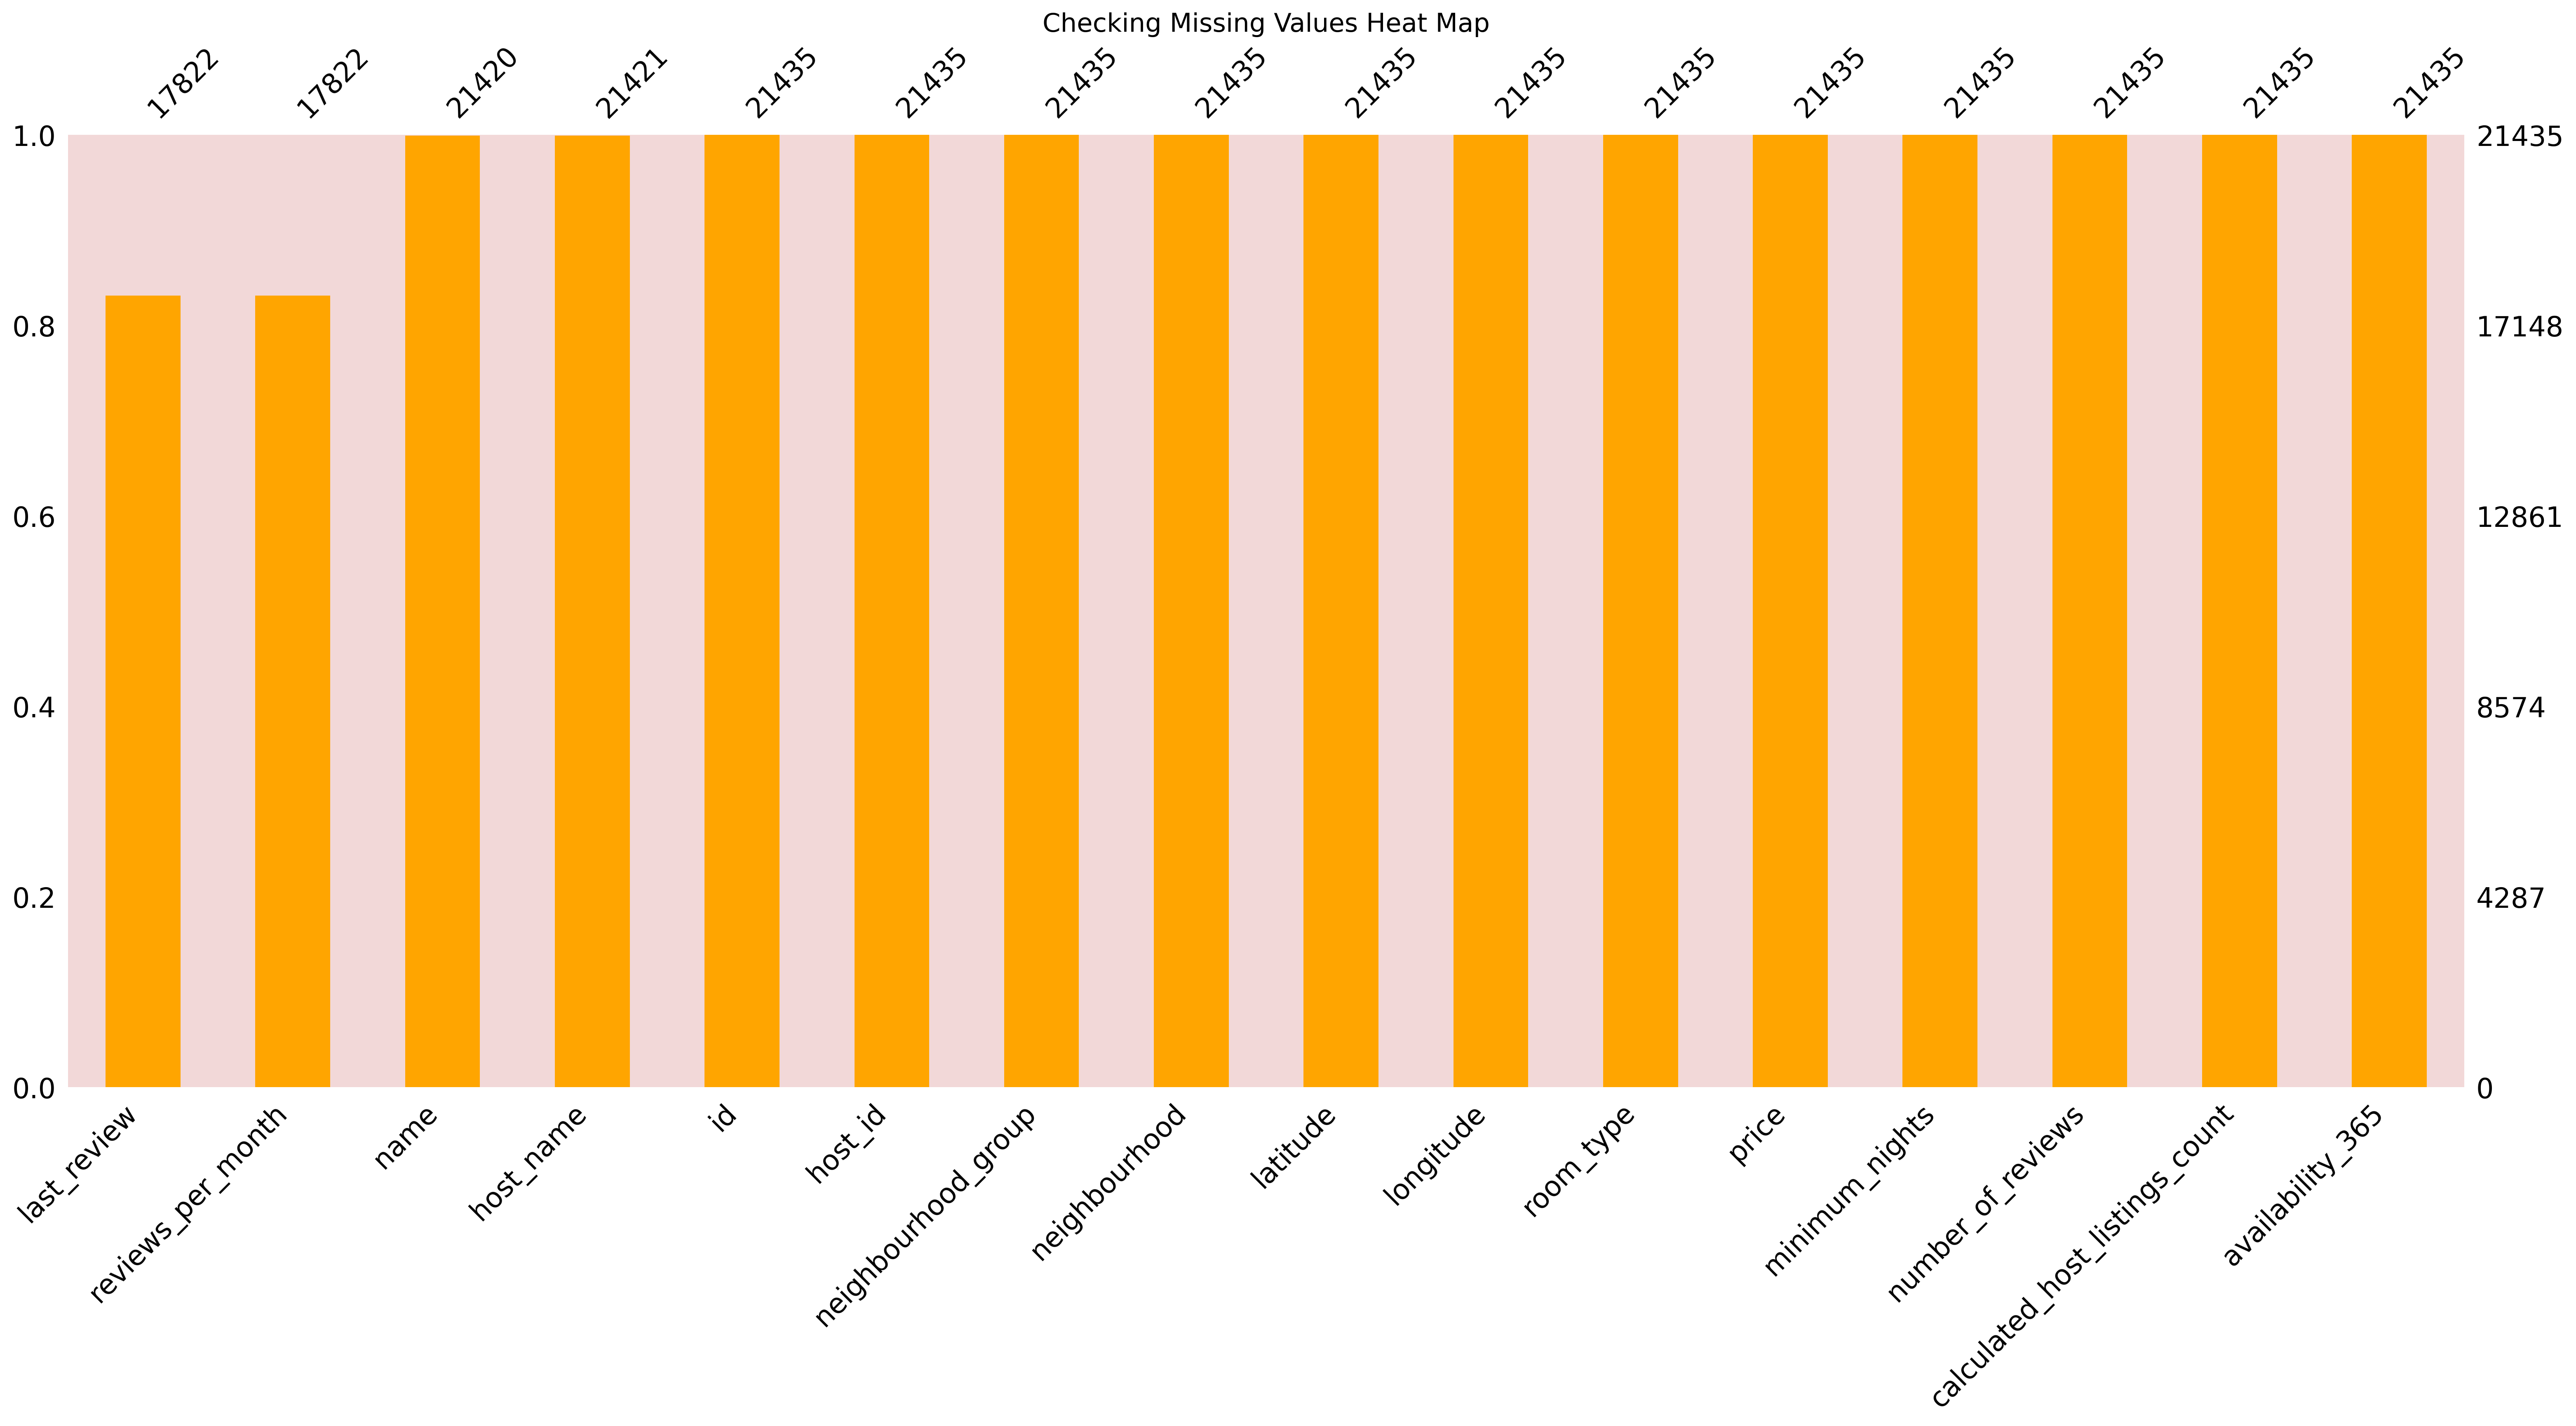

In [60]:
# Visualizing missing values as a metrix 
import missingno as mno

mno.bar(data, color = 'orange', sort = 'ascending')
plt.title('Checking Missing Values Heat Map', fontsize = 15)
plt.show()

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns 'name','id','host_name','last_review' are irrelevant and insignificant to our data analysis,  Therefore, let's proceed with removing columns that are not important to us.

**We can see that we still have null values in reviews_per_month column, so we will impute missing values with 0 of reviews_per_month column.**

In [61]:
data['reviews_per_month'].fillna(data.reviews_per_month.mode()[0], inplace=True)

In [62]:
# Let's check for the null values in the dataset
print(data.isnull().sum())
print('------------------------------------')
print(f"Shape of the dataset: {data.shape}")

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3613
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64
------------------------------------
Shape of the dataset: (21435, 16)


In [63]:
# Extracting categorical column names
data.select_dtypes(include=['object']).columns.tolist()

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'reviews_per_month']

In [64]:
# Get unique categorical values with counts from the 'Category' column
print(data['room_type'].value_counts())
print('-------------------------')
print(data['neighbourhood_group'].value_counts())

room_type
"Entire home/apt"    11497
"Private room"        9109
"Shared room"          330
Entire home/apt        290
Private room           205
Shared room              4
Name: count, dtype: int64
-------------------------
neighbourhood_group
"Manhattan"        9724
"Brooklyn"         8989
"Queens"           1815
"Bronx"             301
Brooklyn            236
Manhattan           229
"Staten Island"     107
Queens               22
Bronx                 7
Staten Island         5
Name: count, dtype: int64


In [65]:
# Replace all occurrences of "" in the columns
data['room_type'] = data['room_type'].str.replace('"', '')
data['neighbourhood_group'] = data['neighbourhood_group'].str.replace('"', '')
data['neighbourhood'] = data['neighbourhood'].str.replace('"', '')

# Again checking the categorical values of these columns
print(data['room_type'].value_counts())
print('-------------------------')
print(data['neighbourhood_group'].value_counts())

room_type
Entire home/apt    11787
Private room        9314
Shared room          334
Name: count, dtype: int64
-------------------------
neighbourhood_group
Manhattan        9953
Brooklyn         9225
Queens           1837
Bronx             308
Staten Island     112
Name: count, dtype: int64


In [66]:
# Converting 'latitude' and 'longitude' 'reviews_per_month' columns to float dtype
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])
data['reviews_per_month'] = pd.to_numeric(data['reviews_per_month'])

# Checking the data types
print(data.dtypes)

id                                       float64
name                                      object
host_id                                  float64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
dtype: object


In [67]:
data.head()

id                                              name  host_id  \
0  2539.0                Clean & quiet apt home by the park   2787.0   
1  2595.0                             Skylit Midtown Castle   2845.0   
2  3647.0               THE VILLAGE OF HARLEM....NEW YORK !   4632.0   
3  3831.0                   Cozy Entire Floor of Brownstone   4869.0   
4  5022.0  Entire Apt: Spacious Studio/Loft by central park   7192.0   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0             1.0                9.0  2018-10-19   
1  Entire home/apt  225.0             1.0               45.0  2019-05-21   
2     Private room  150.0             3.0                0.0         NaT   
3  Entire home/apt   89.0             1.0              270.0  2019-07-05   
4  Entire home/apt   80.0            10.0                9.0  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                             6.0             365.0  
1               0.38                             2.0             355.0  
2               0.02                             1.0             365.0  
3               4.64                             1.0             194.0  
4               0.10                             1.0               0.0

### Exploratory Data Analysis

**Airbnb is a platform that connects people who want to rent out their homes with people who are looking for accommodations in that locale. So, from "host_id" column, we can easily analyze the hosts who share the most posts.**

Text(0.5, 1.0, 'Top 5 Hosts With Most Posts')

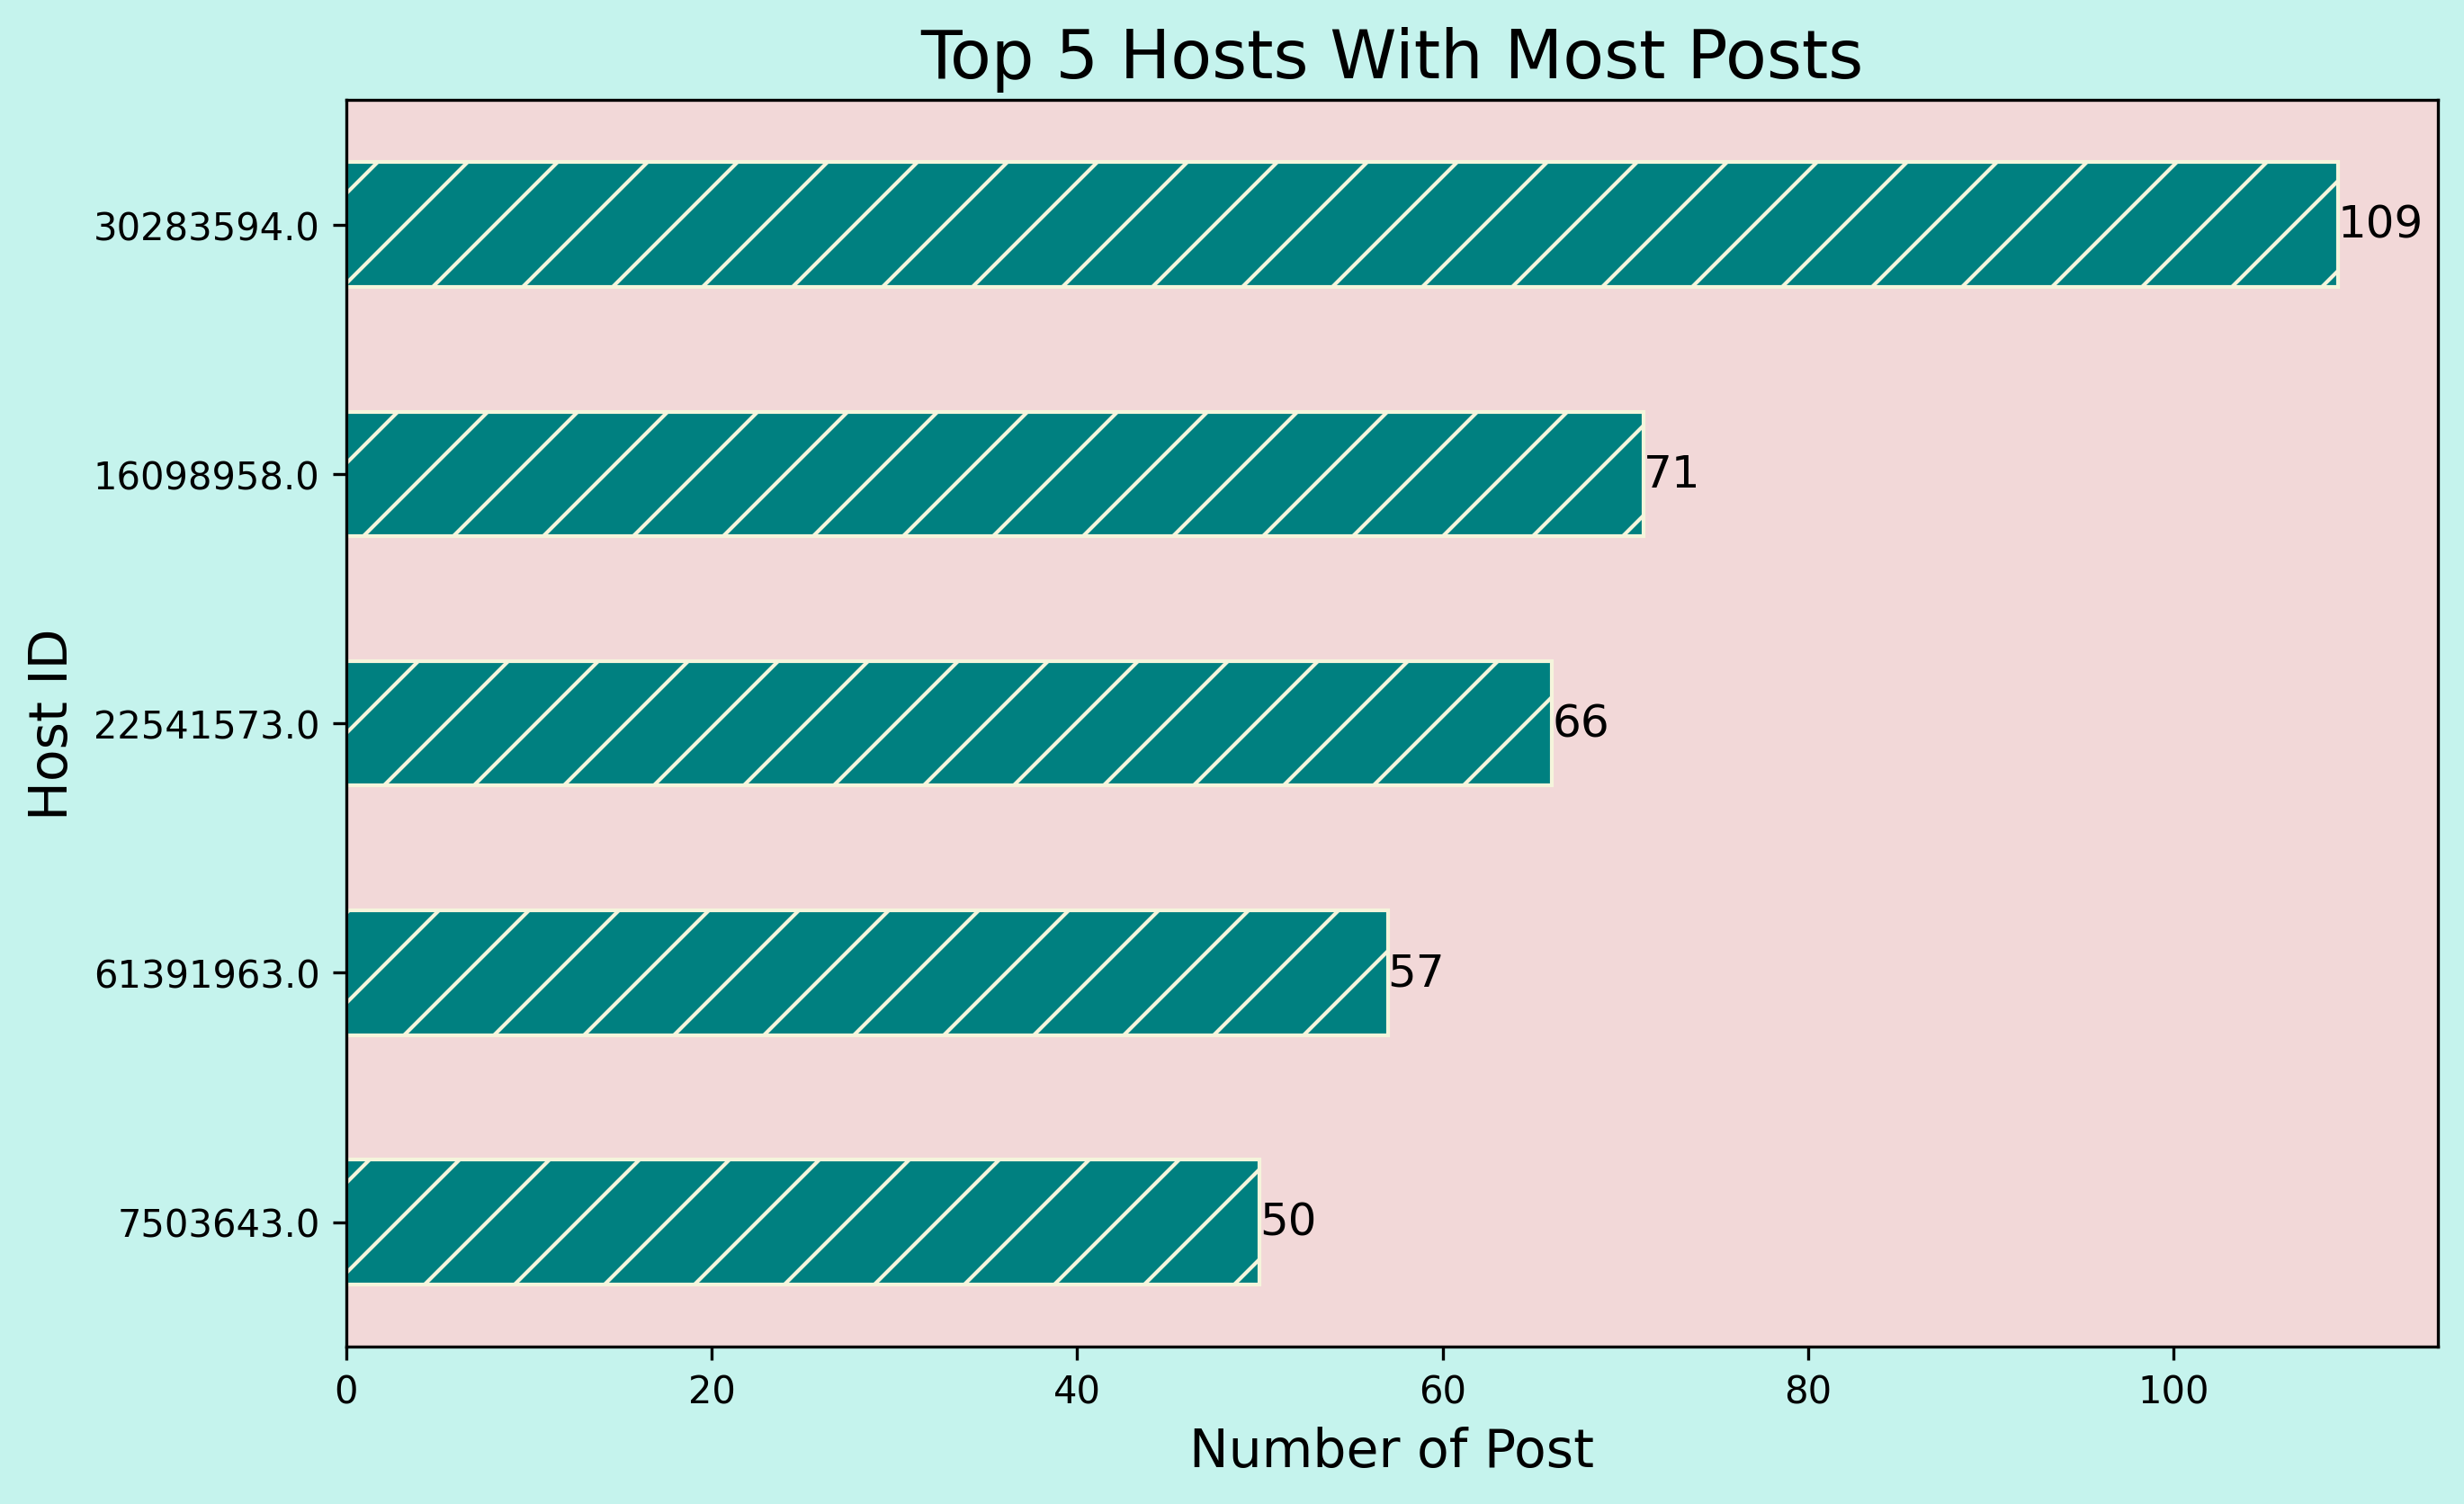

In [68]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
data["host_id"].value_counts().head().sort_values().plot(kind = "barh", 
                                                       color = "teal", 
                                                       hatch="/", 
                                                       edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Post", size = 14)
plt.ylabel("Host ID", size = 14)
plt.title("Top 5 Hosts With Most Posts", size = 18)

From which neighborhoods did "host 30283594" share the most posts?

Text(0.5, 1.0, 'Neighborhoods with the Most Posts by "host 219517861"')

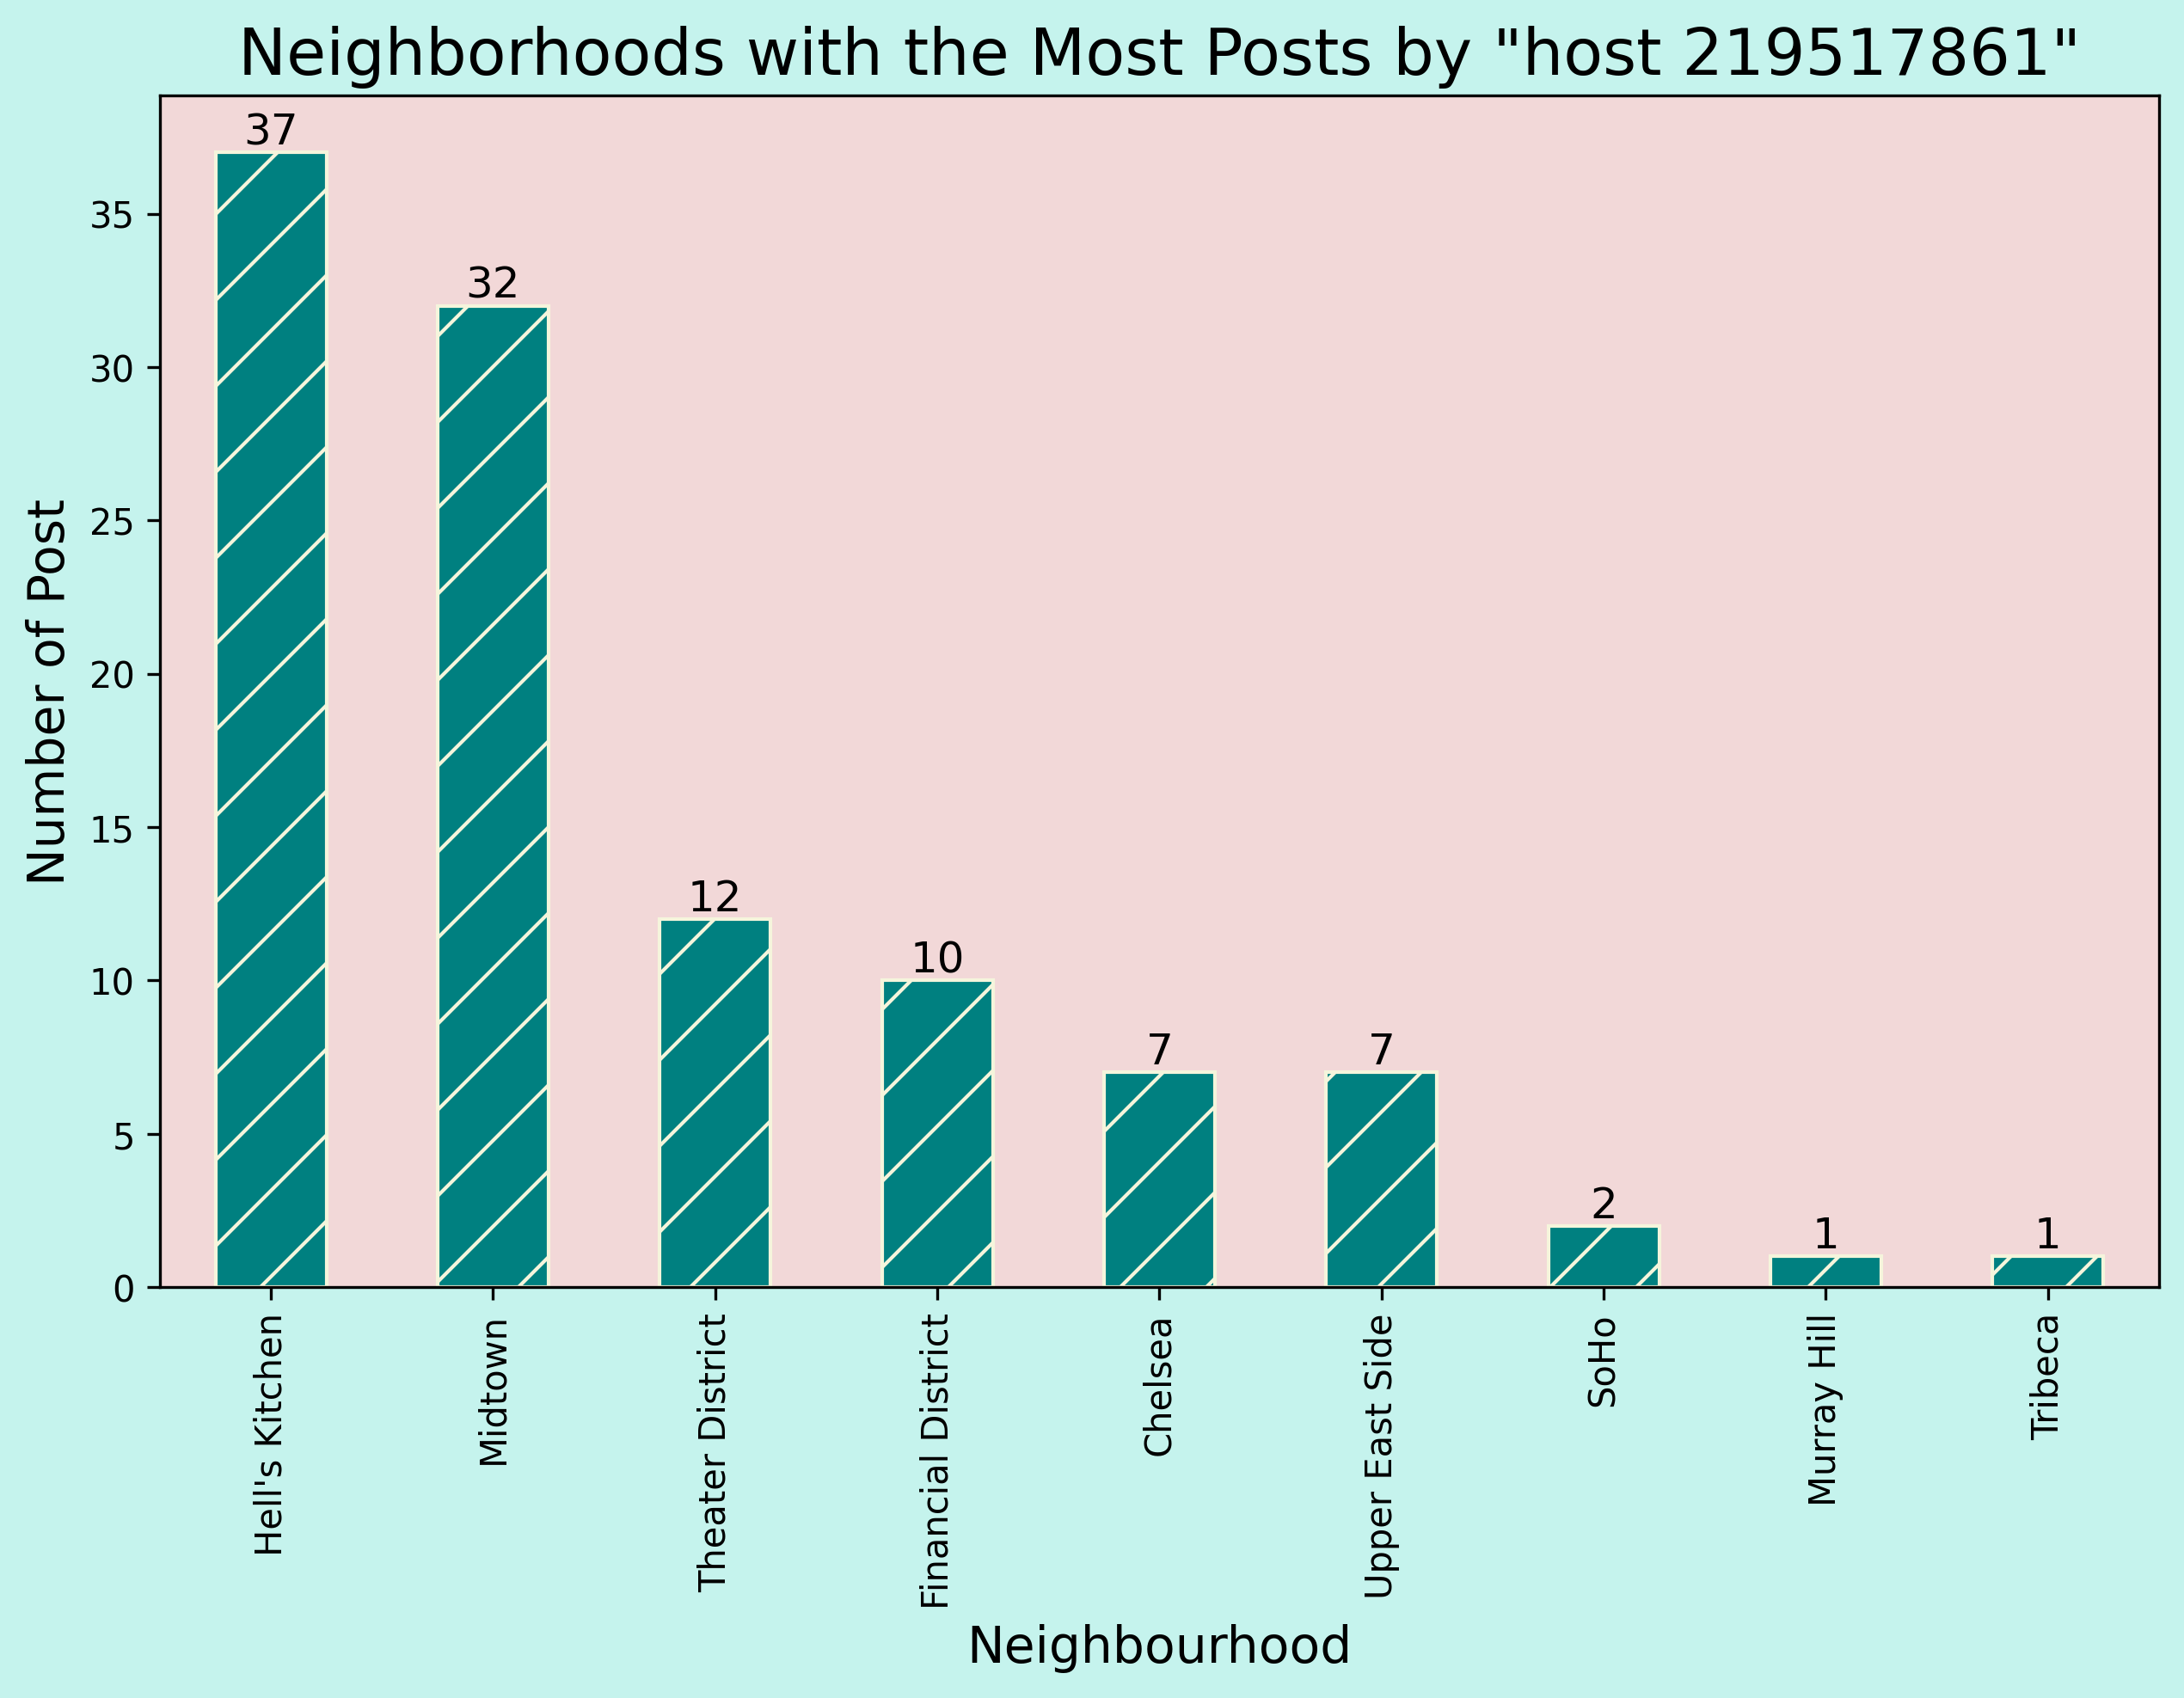

In [69]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
data.loc[data['host_id'] == 30283594]["neighbourhood"].value_counts().plot(kind = "bar", 
                                                                        color = "teal",
                                                                        hatch="/",
                                                                        edgecolor="beige")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Number of Post", size = 14)
plt.title('Neighborhoods with the Most Posts by "host 219517861"', size = 18)

Let's check how many distinct values we have.

In [70]:
print(f"There are {data['neighbourhood_group'].nunique()} distinct values.")

There are 5 distinct values.


Text(0.5, 1.0, 'Neighbourhood Groups')

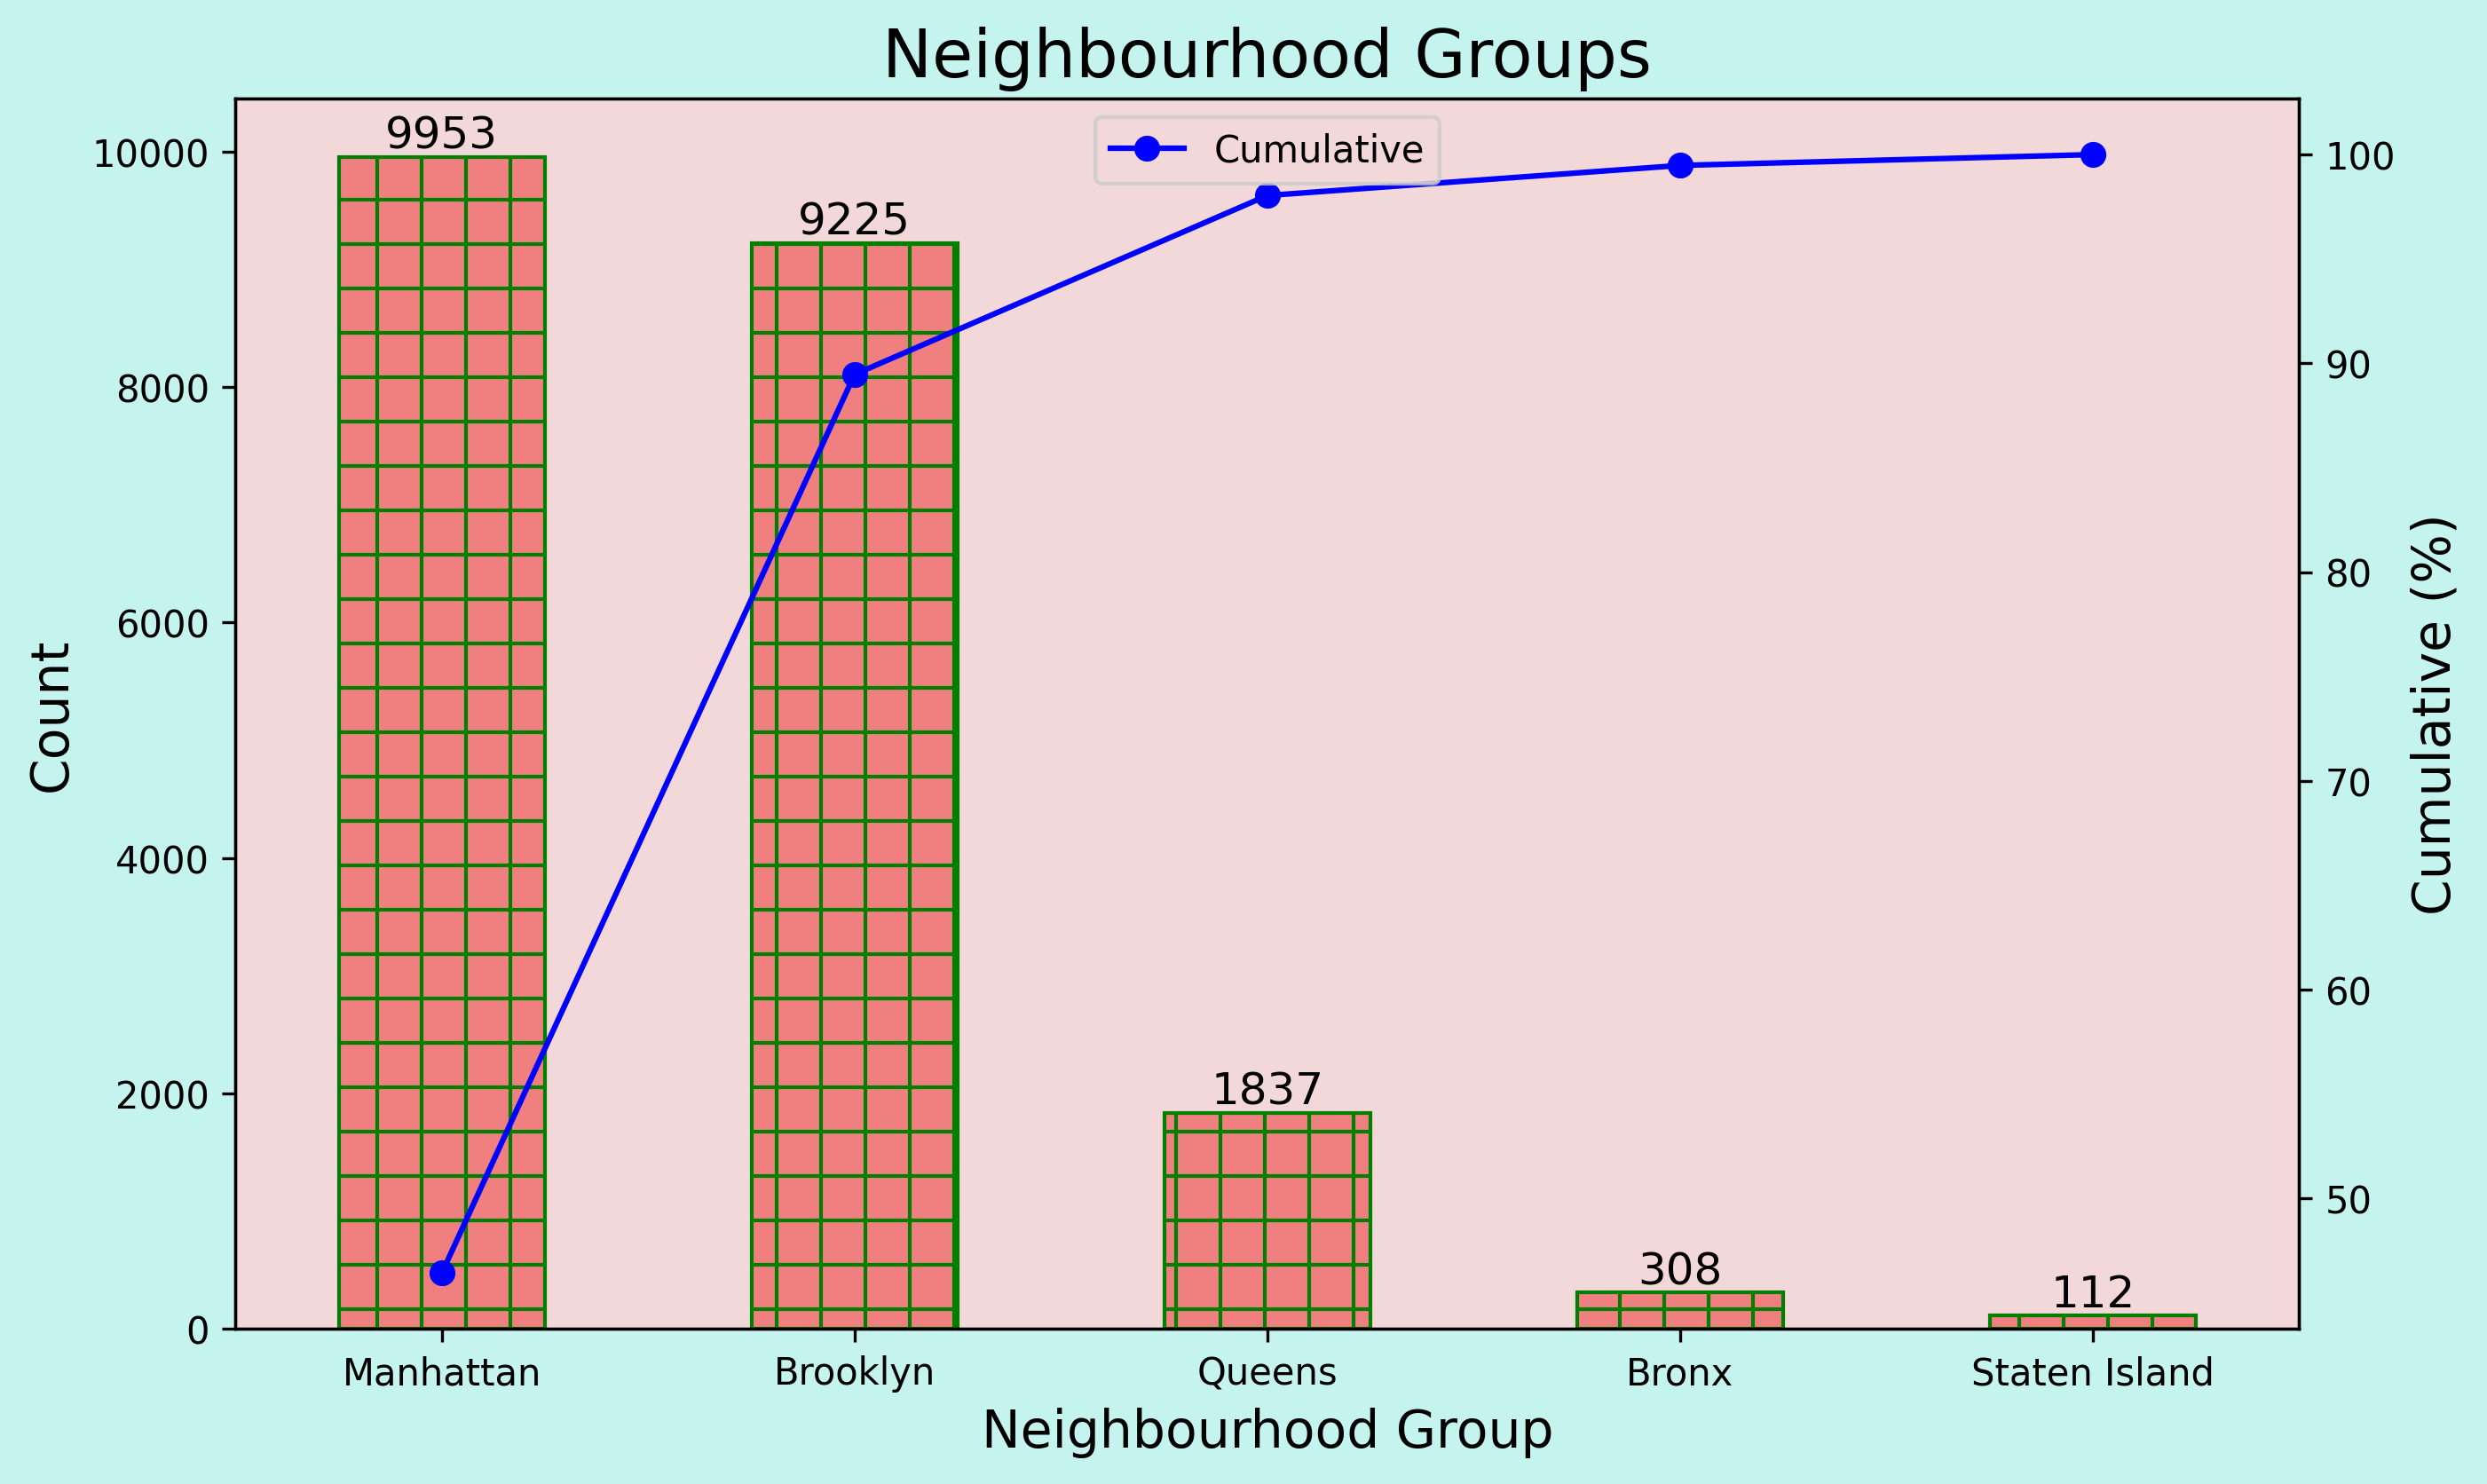

In [71]:
cumulative = round(data["neighbourhood_group"].value_counts(normalize=True).cumsum()*100, 2)
plt.figure(facecolor='#C5F3ED')
ax1 = data["neighbourhood_group"].value_counts().sort_values(ascending=False).plot(kind = "bar", 
                                                                                 color = "lightcoral",
                                                                                 hatch="+", 
                                                                                 edgecolor="green")

ax1.bar_label(ax1.containers[0], fmt='%.0f', color="black", fontsize=12)

ax2 = cumulative.plot(kind="line", color="blue", secondary_y=True,marker="o")
ax1.set_xlabel("Neighbourhood Group",  size = 14)
ax1.set_ylabel("Count", size = 14)
ax2.set_ylabel("Cumulative (%)", size = 14)
ax2.legend(["Cumulative"],loc=9)
plt.title("Neighbourhood Groups", size = 18)

As it's seen on the graph, "neighbourhood_group" column is largely made up of Manhattan and Brooklyn.

Let's check the average, min and max prices for each neighbourhood group!

In [72]:
data.groupby("neighbourhood_group")["price"].agg(["mean","max", "min"]).style.highlight_min(subset=["min"],
                                                                                          color = 'tomato',
                                                                                          axis = 0)

In [73]:
data = data[data["price"] != 0]

Text(0.5, 1.0, 'Average Price of Neighbourhood Groups')

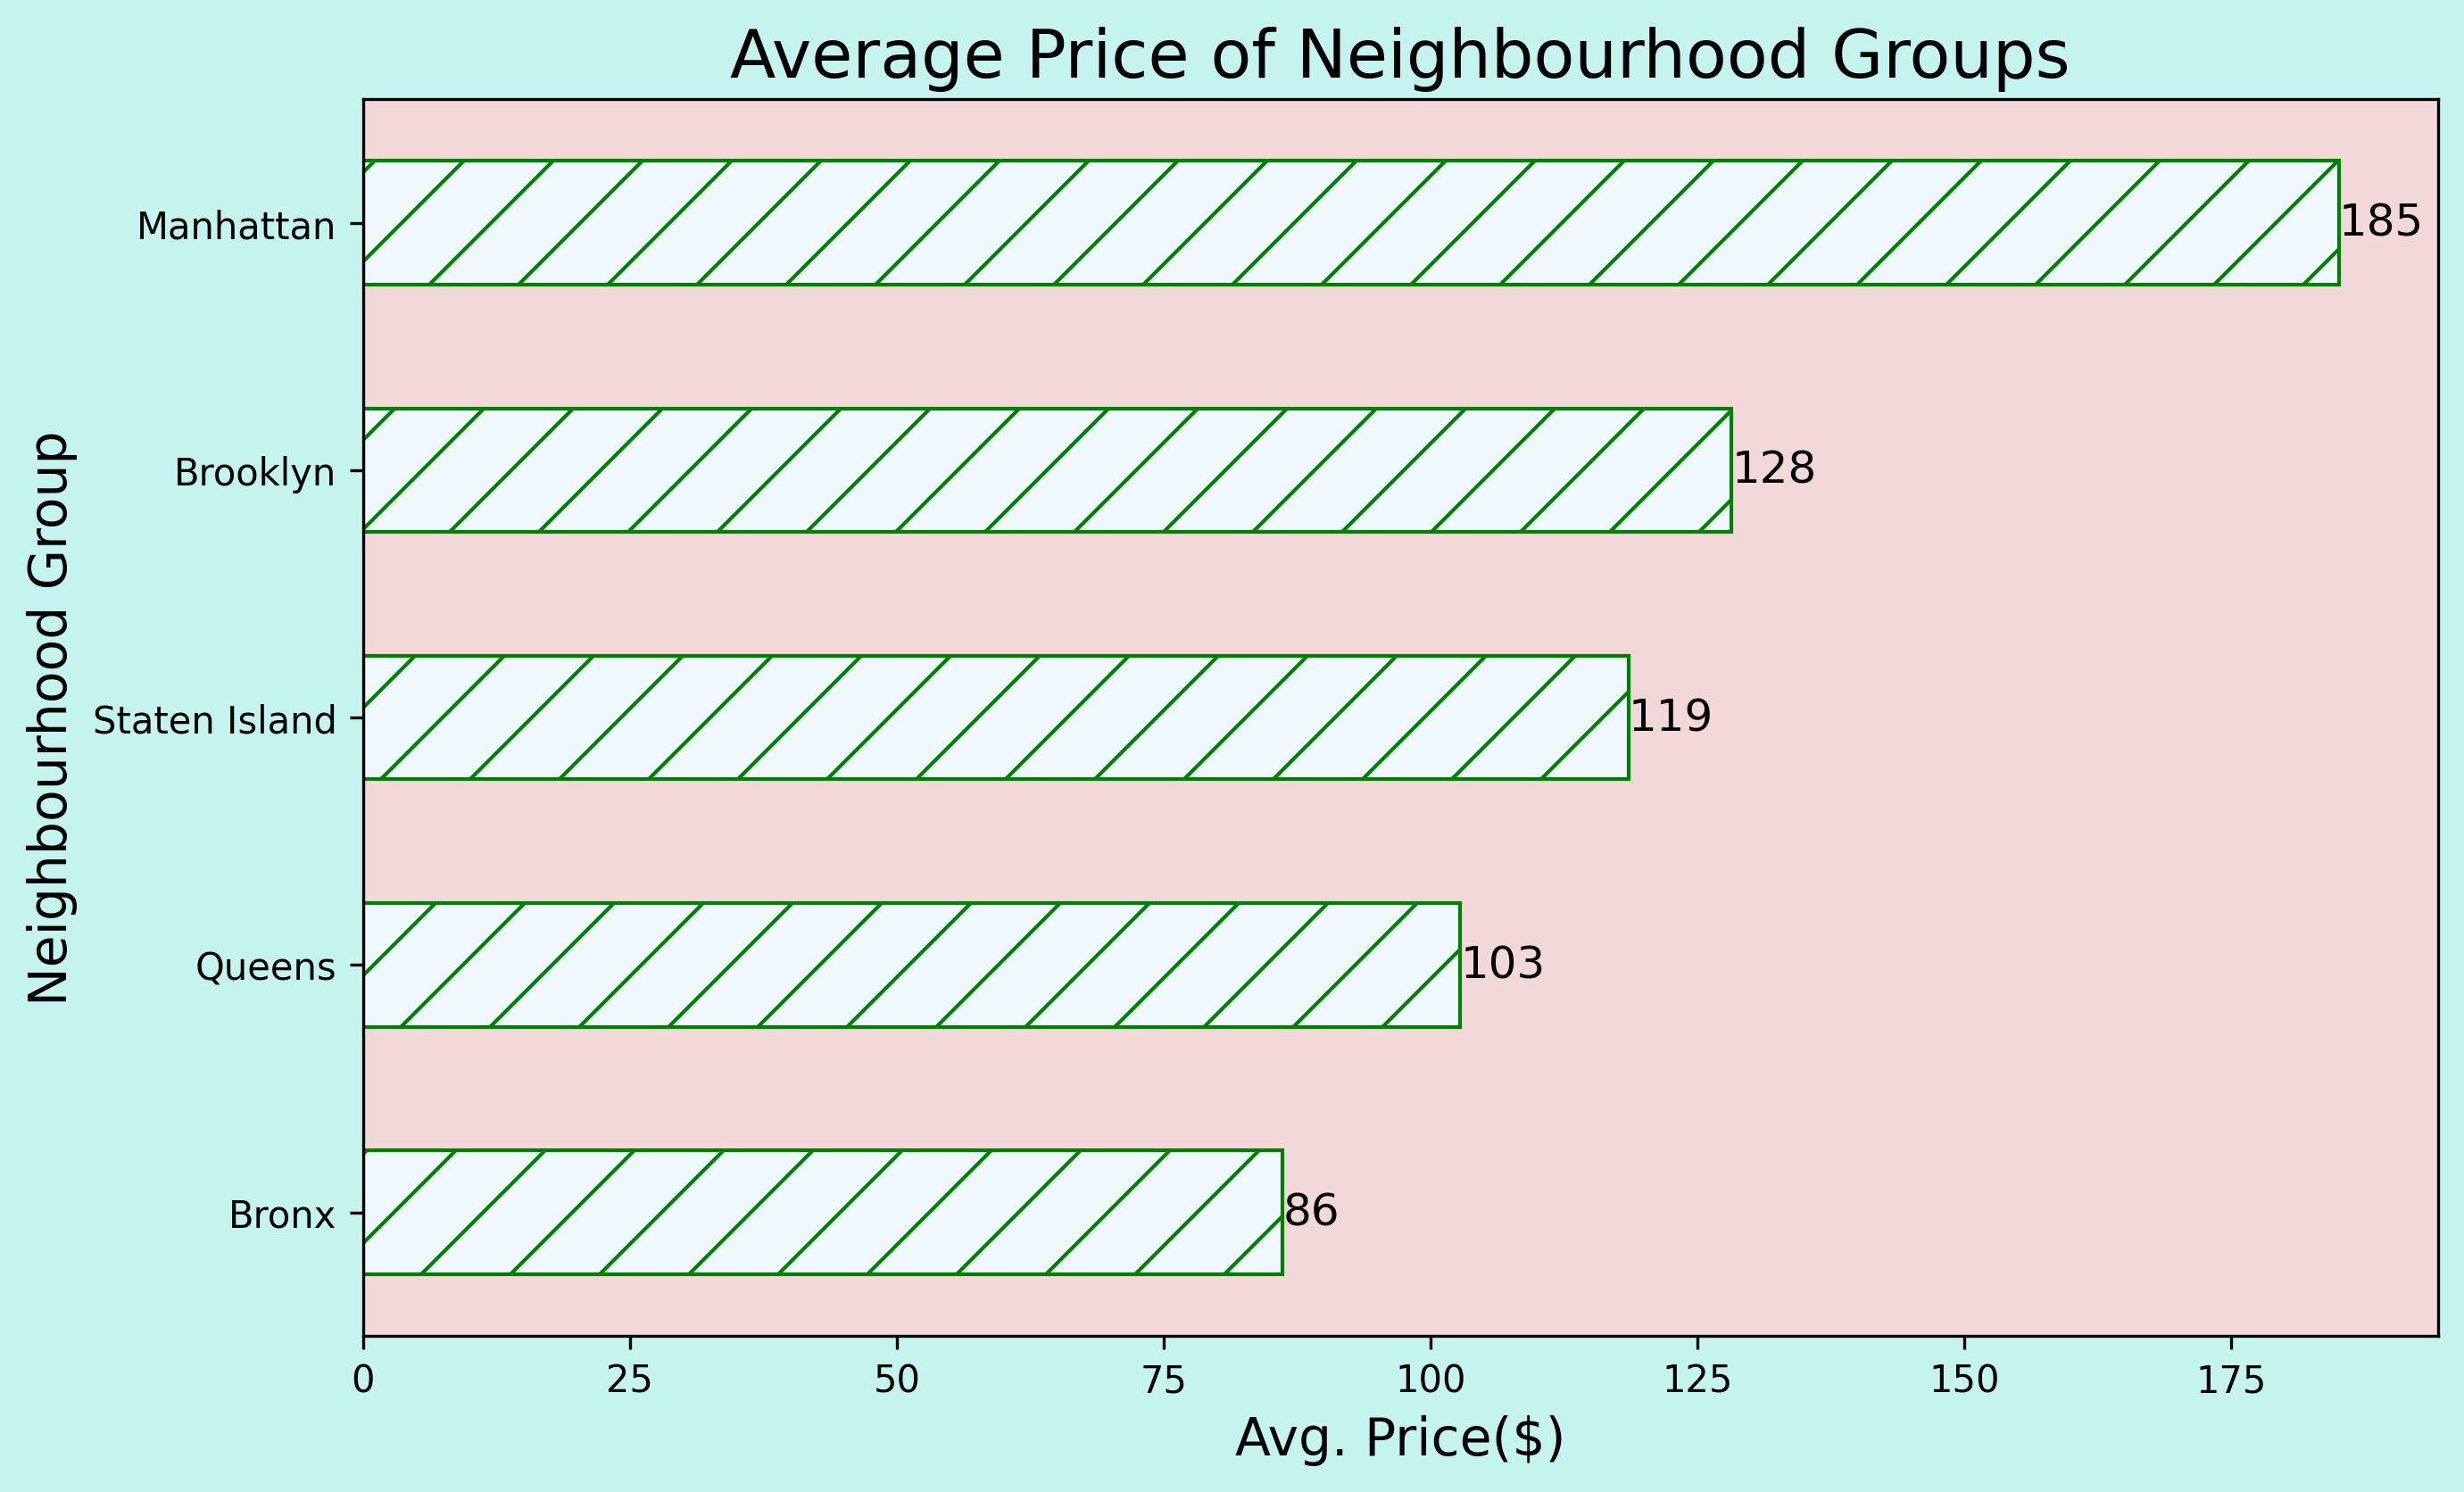

In [74]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
data.groupby("neighbourhood_group")["price"].agg("mean").sort_values().plot(kind = "barh", 
                                                                          color = "aliceblue",
                                                                          hatch="/", 
                                                                          edgecolor="green")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Avg. Price($)", size = 14)
plt.ylabel("Neighbourhood Group", size = 14)
plt.title("Average Price of Neighbourhood Groups", size = 18)

Average Price in Manhattan is pretty higher than other neighbourhood groups.


Let's check how many distinct values we have.

In [75]:
print(f"There are {data['neighbourhood'].nunique()} distinct values.")

There are 202 distinct values.


Text(0.5, 1.0, 'Top 10 Neighbourhood')

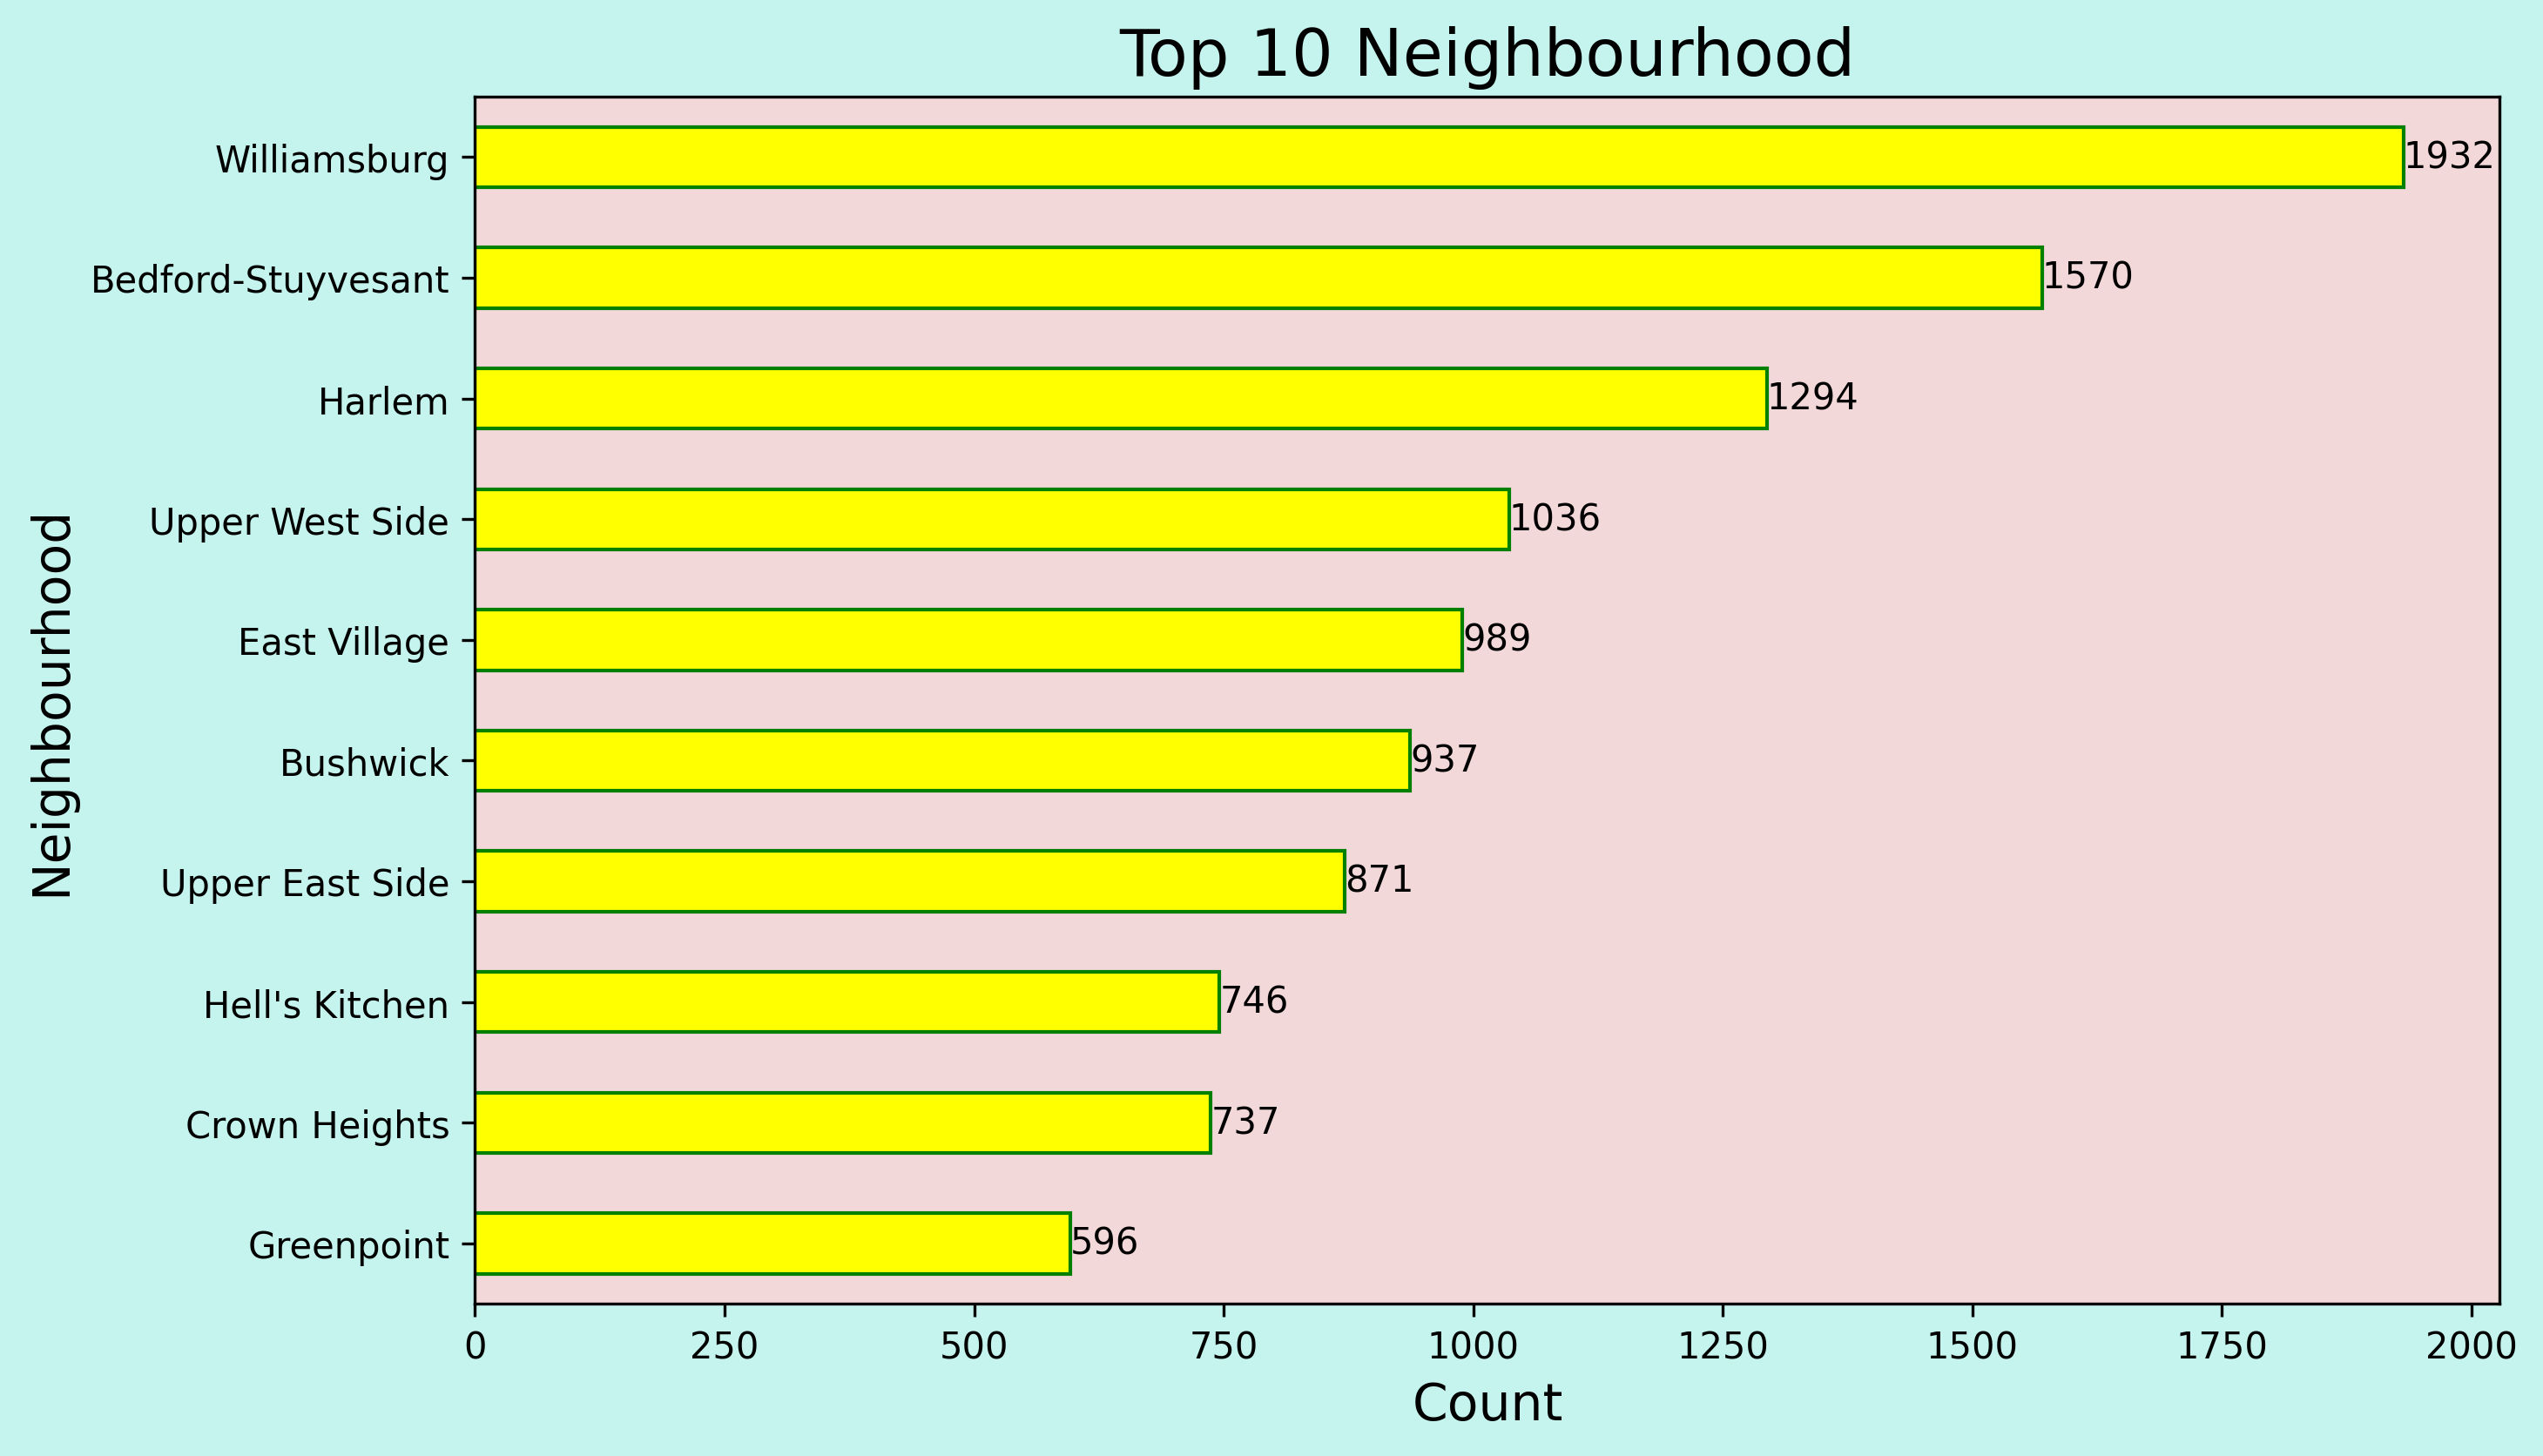

In [76]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
data["neighbourhood"].value_counts().head(10).sort_values().plot(kind = "barh", 
                                                               color = "yellow",
                                                               edgecolor="green")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Count", size = 14)
plt.ylabel("Neighbourhood", size = 14)
plt.title("Top 10 Neighbourhood", size = 18)

Text(0.5, 1.0, 'Top 20 Neighbourhood with Highest Avg. Prices')

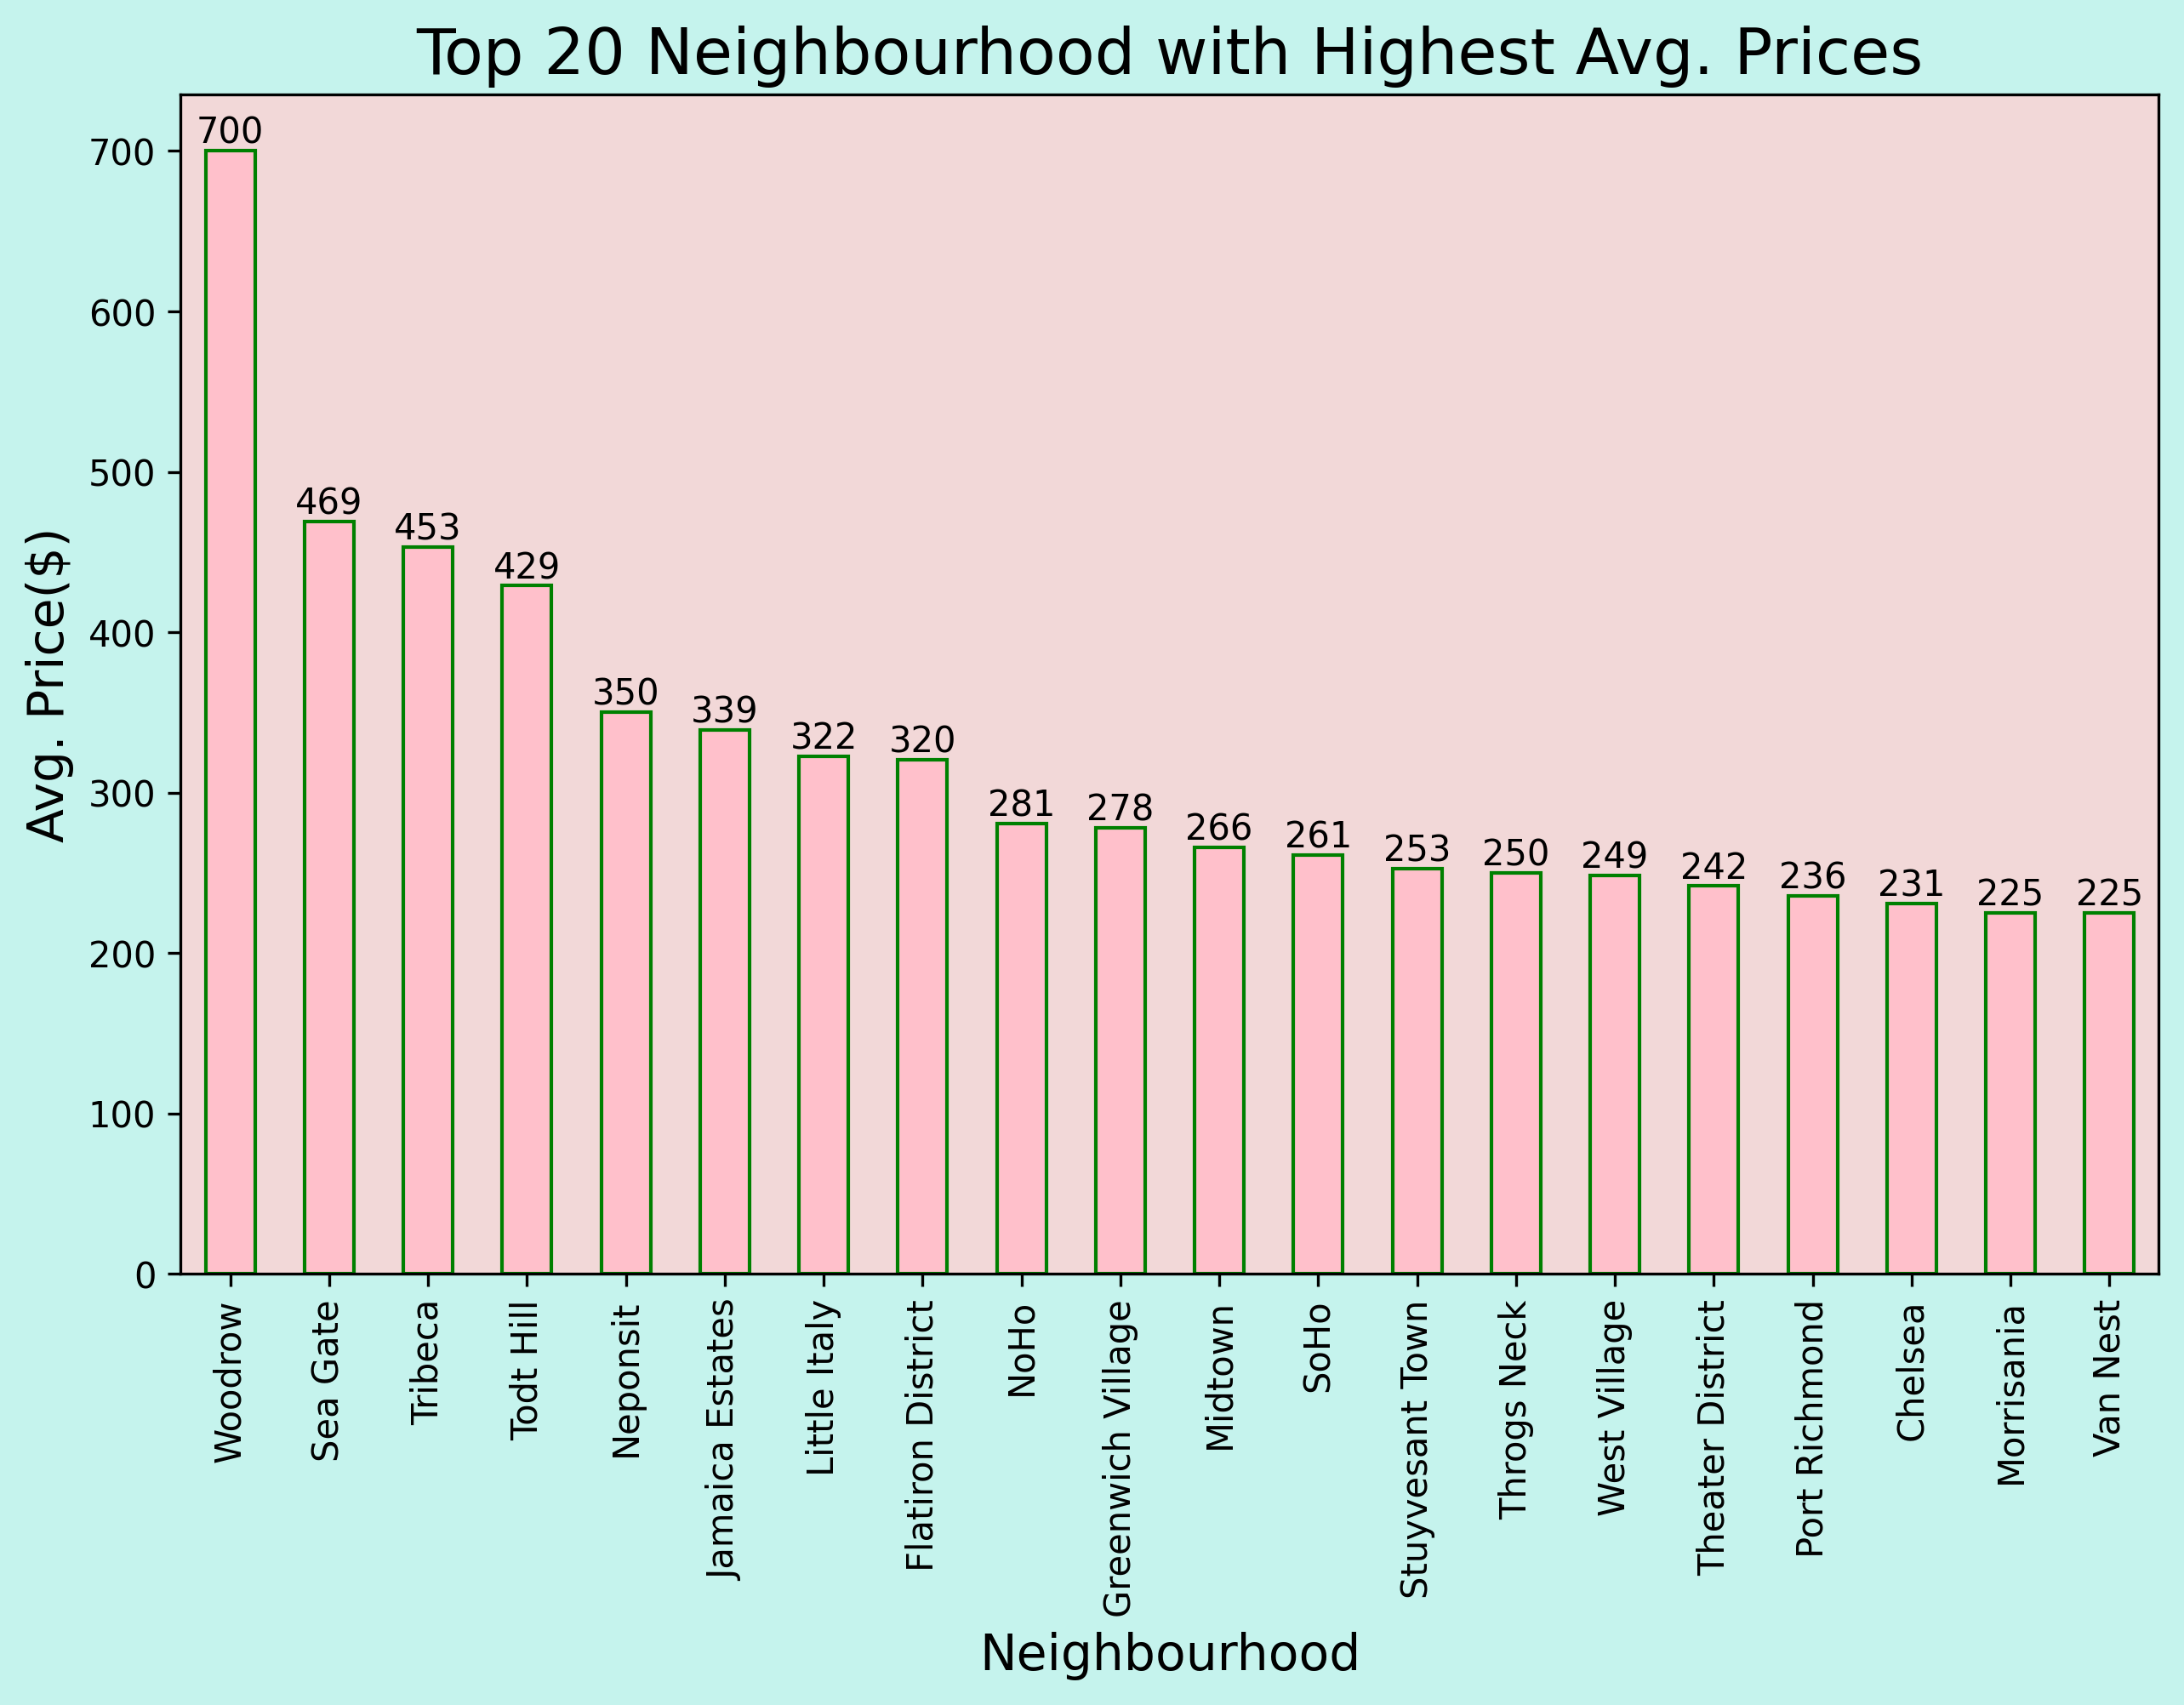

In [77]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
top_20_n_p_mean_data = data.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending=False).head(20)
top_20_n_p_mean_data.sort_values(ascending=False).plot(kind = "bar", 
                                                     color = "pink", 
                                                     edgecolor="green")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Avg. Price($)", size = 14)
plt.title("Top 20 Neighbourhood with Highest Avg. Prices", size = 18)

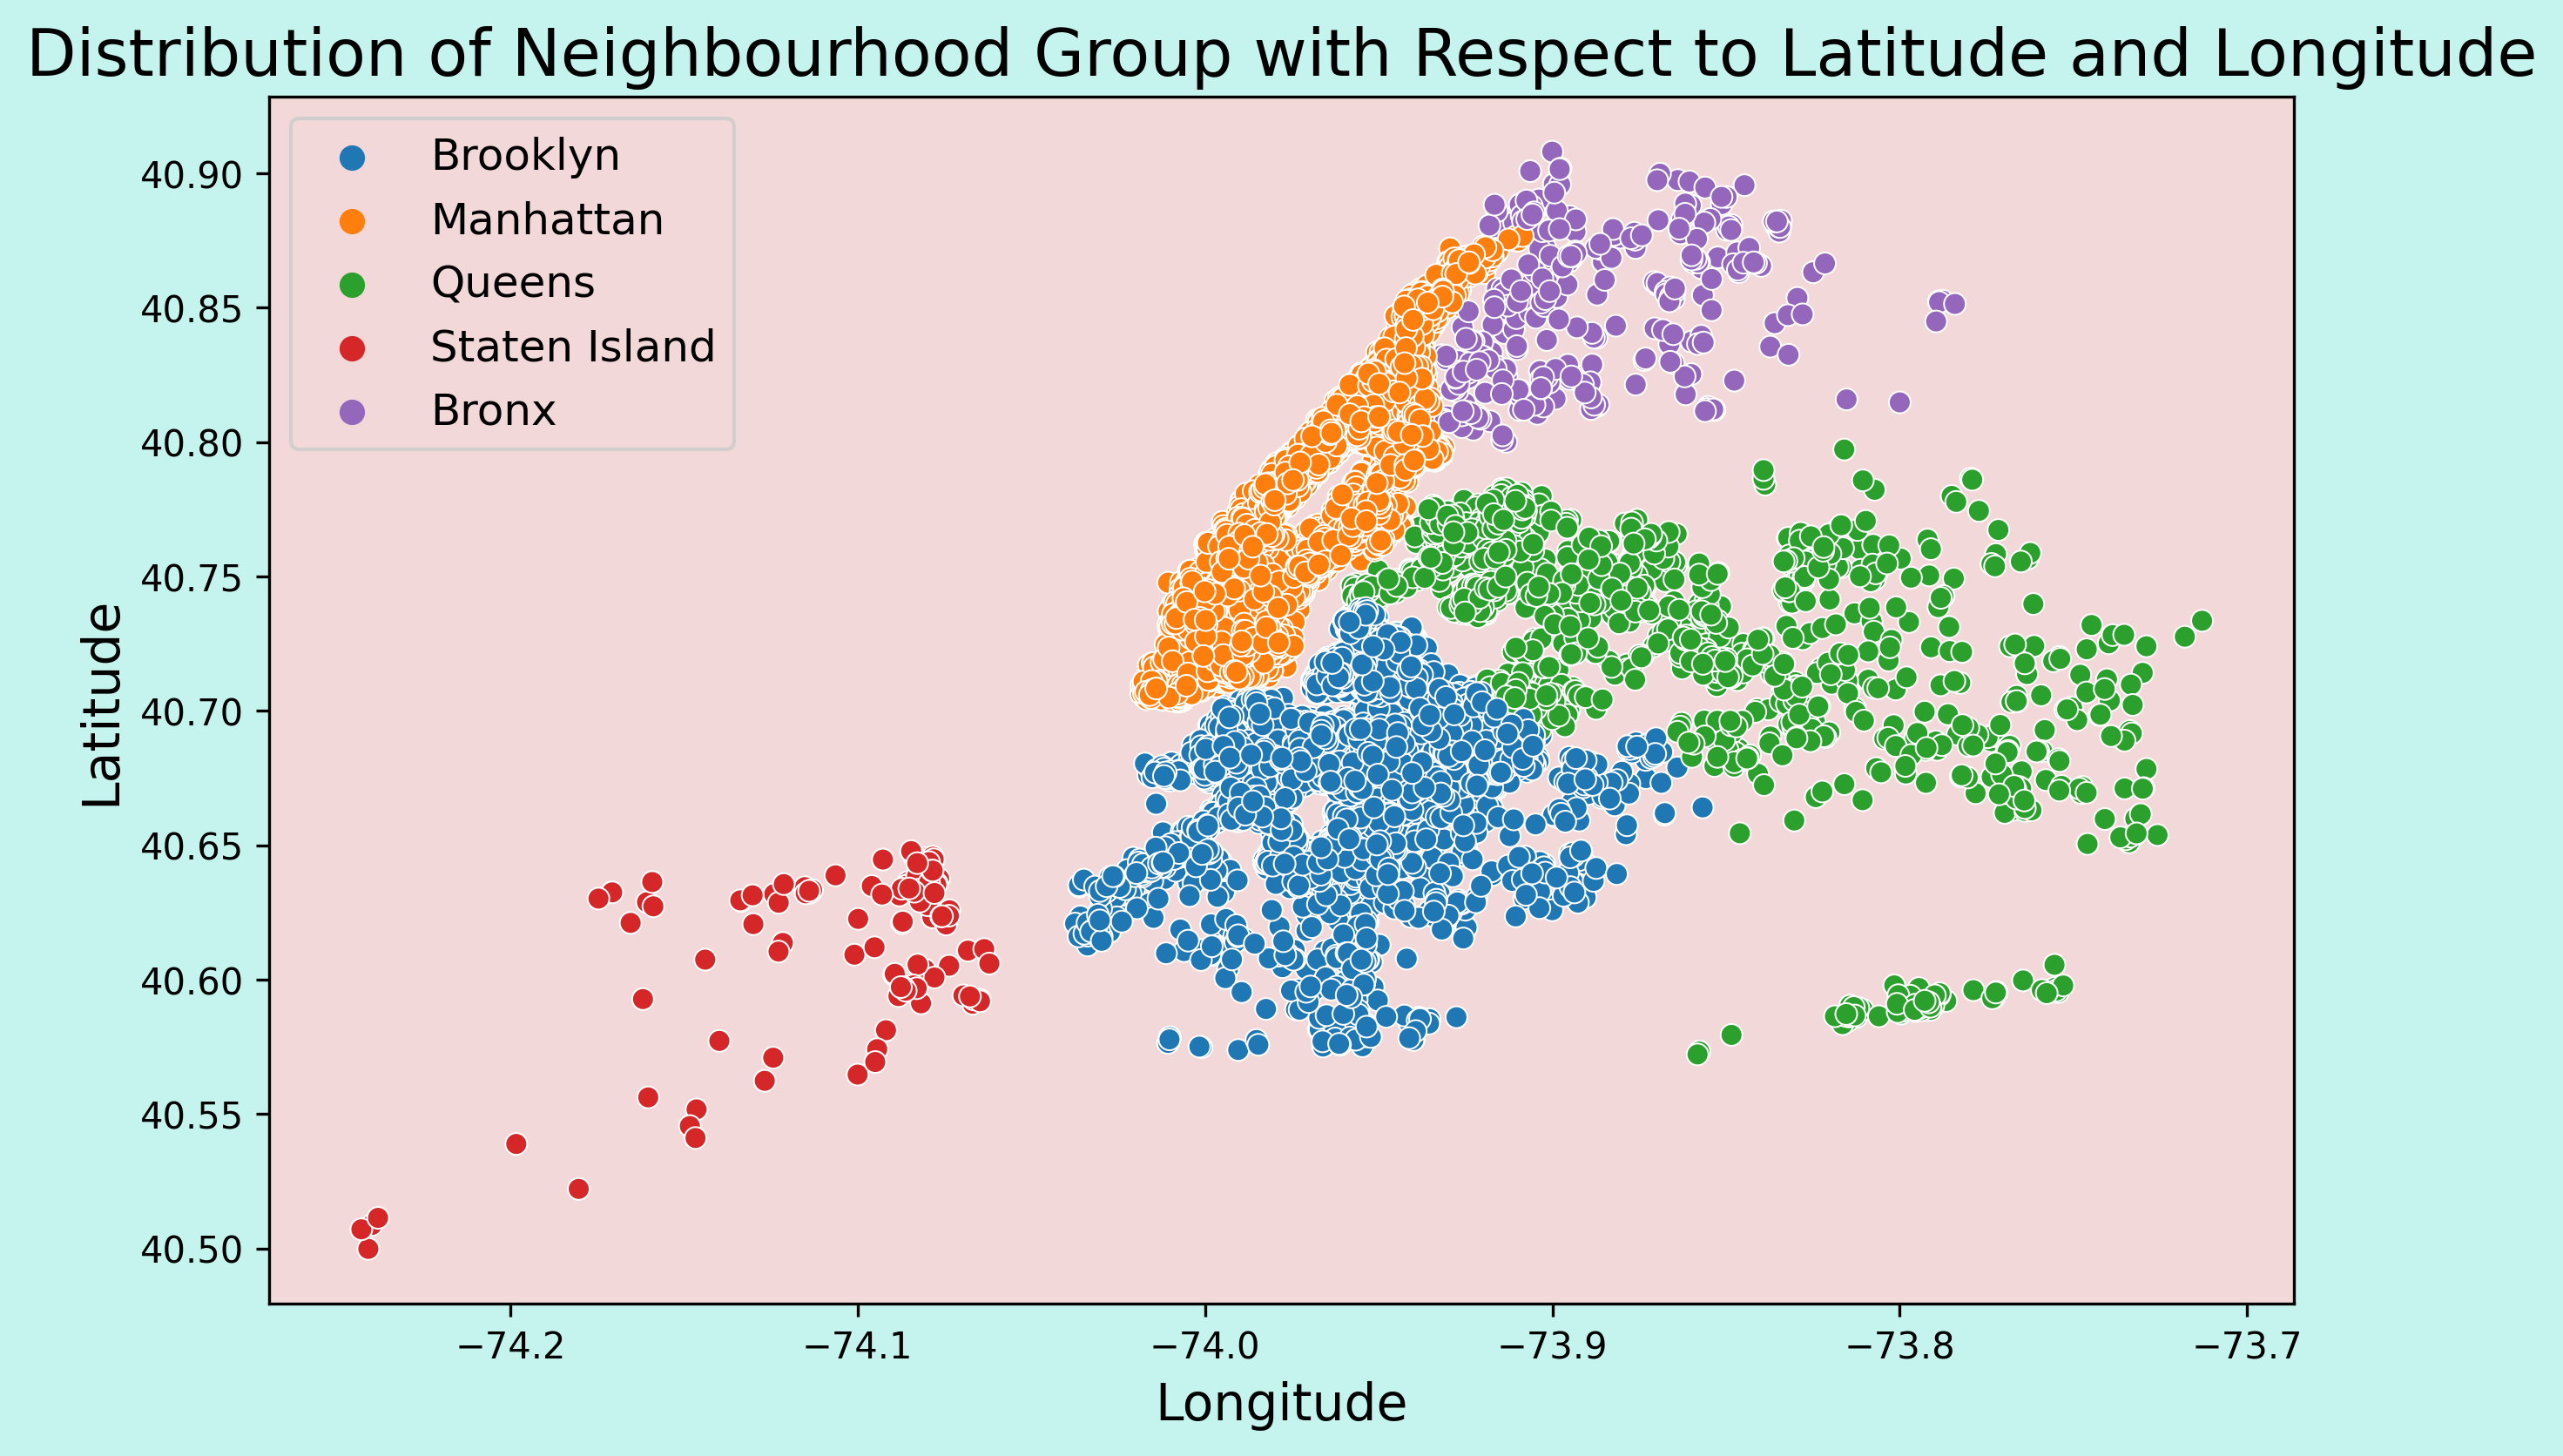

In [78]:
plt.figure(facecolor='#C5F3ED')
sns.scatterplot(data=data, x="longitude", y="latitude", hue="neighbourhood_group")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Distribution of Neighbourhood Group with Respect to Latitude and Longitude", fontsize=18)
plt.legend(prop={"size":12})

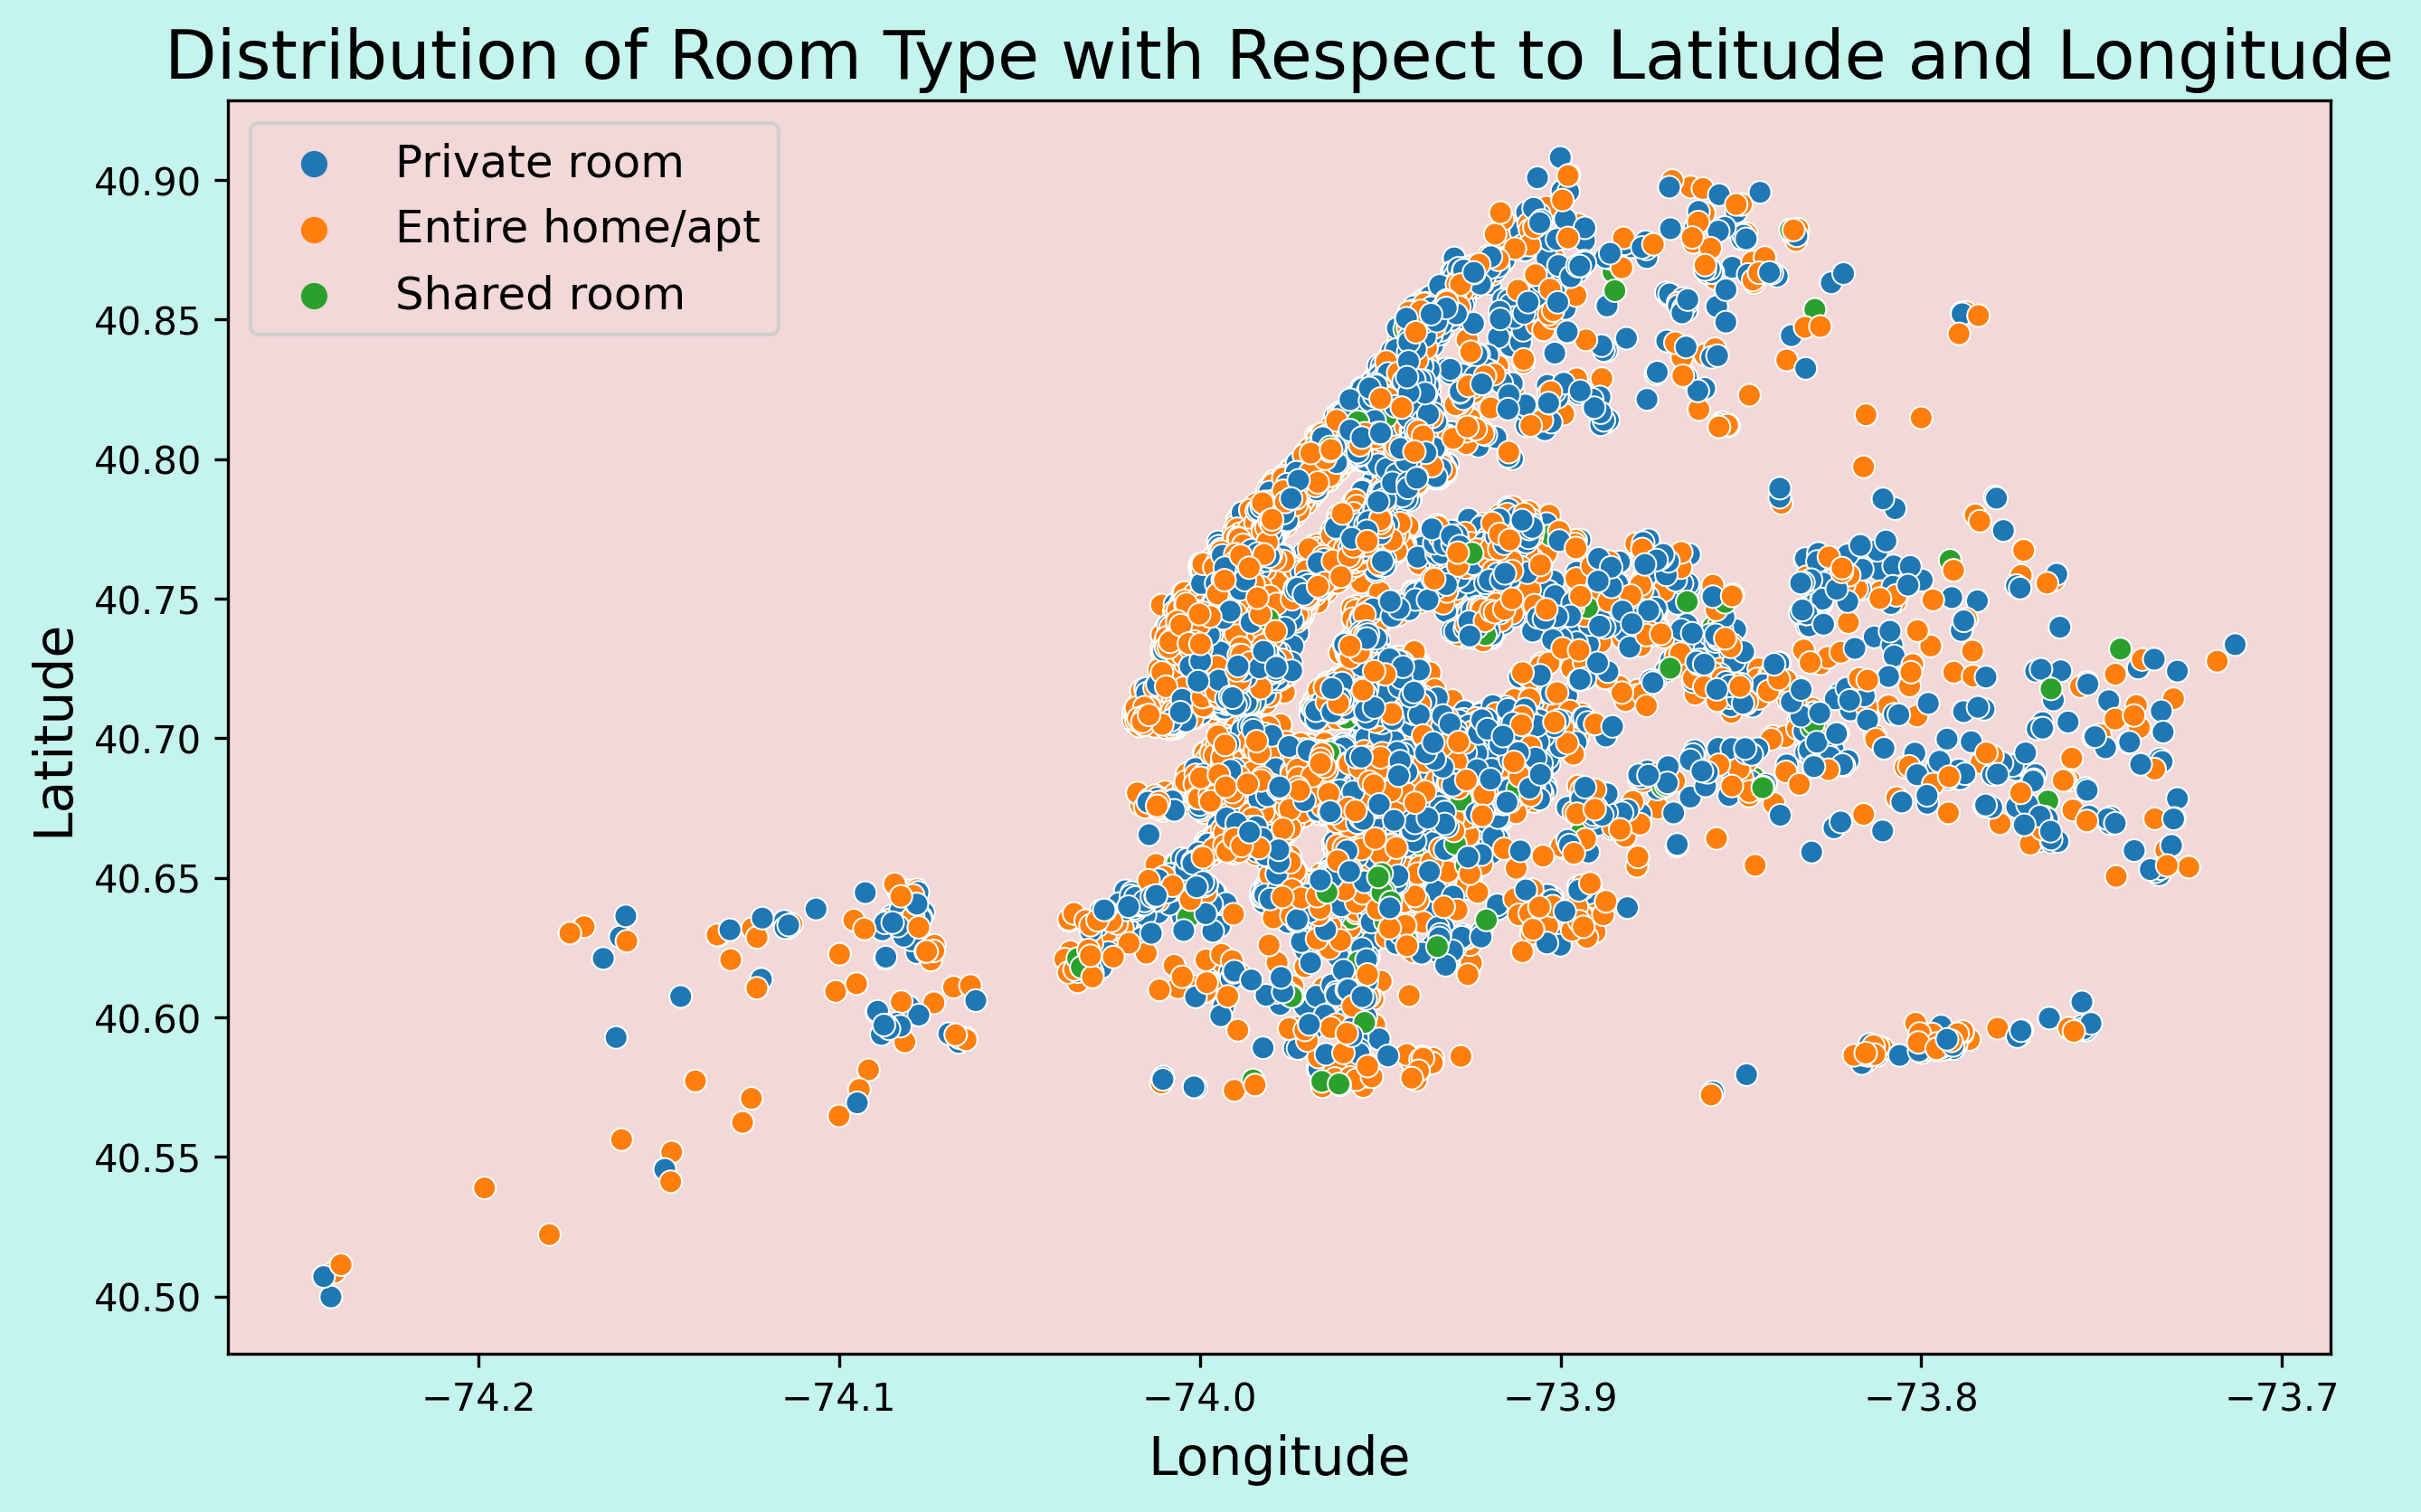

In [79]:
plt.figure(facecolor='#C5F3ED')
sns.scatterplot(data = data, x="longitude", y="latitude", hue="room_type")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Distribution of Room Type with Respect to Latitude and Longitude", fontsize=18)
plt.legend(prop={"size":12})

Text(0.5, 1.0, 'Room Types')

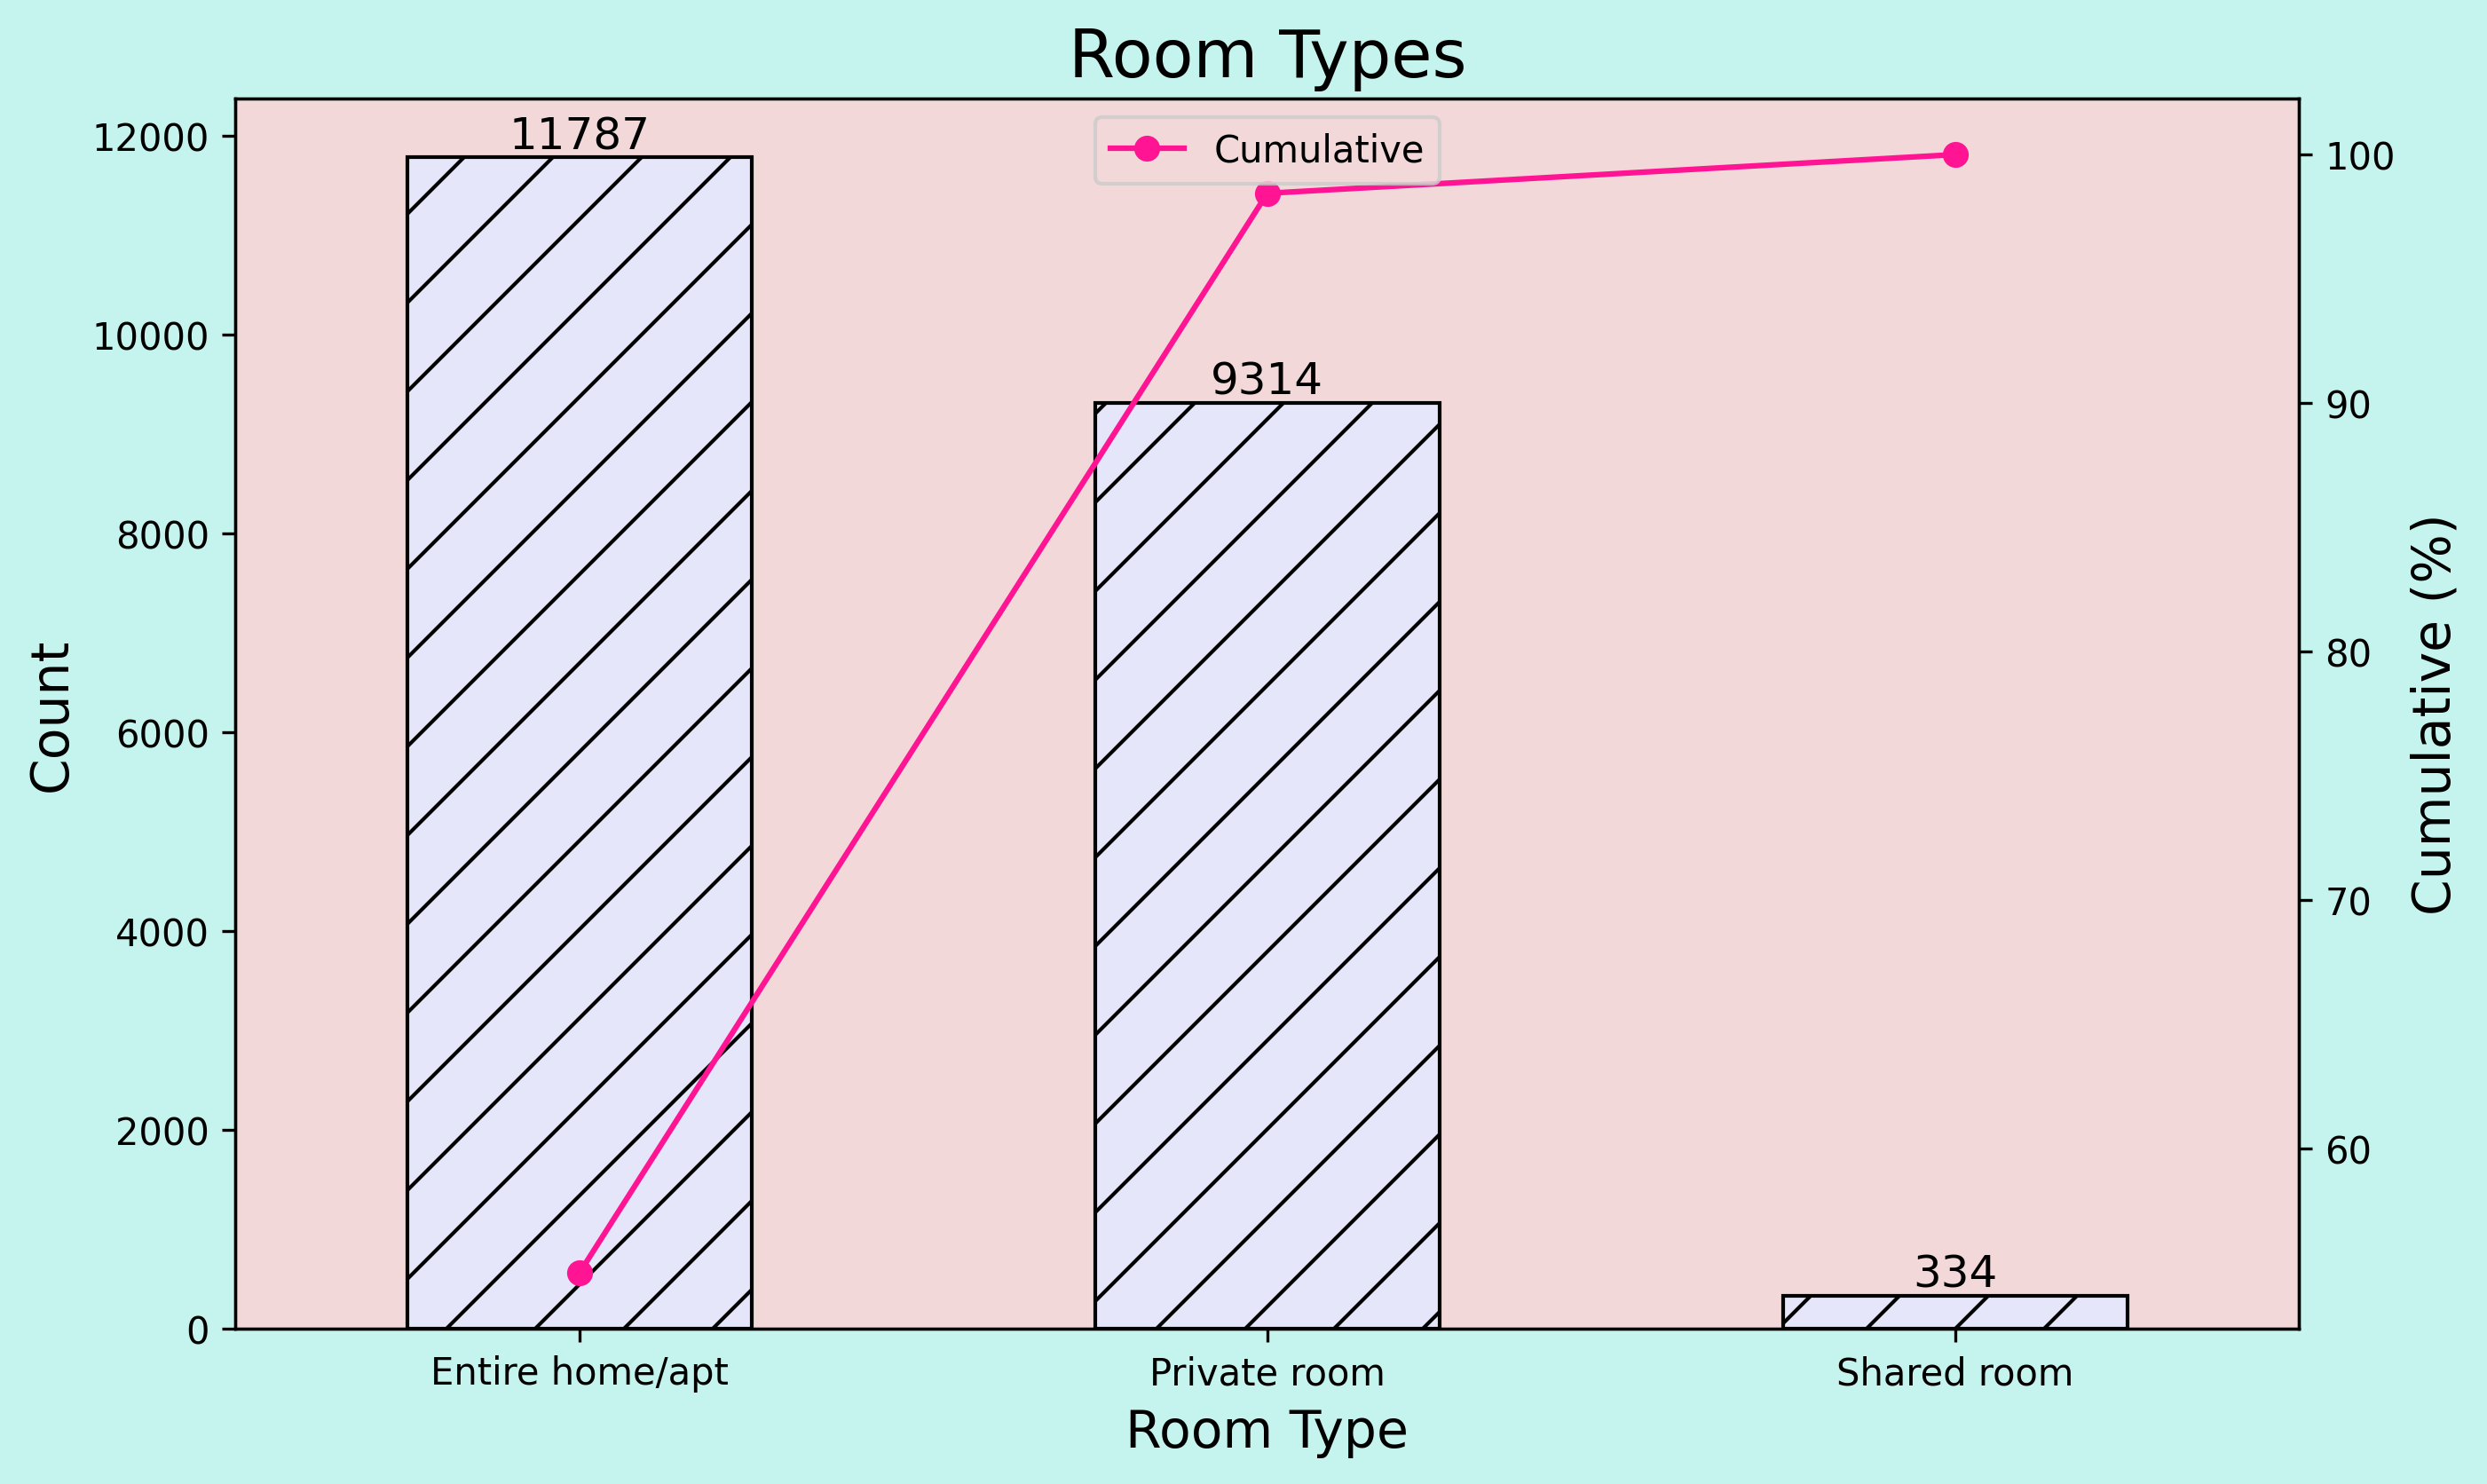

In [80]:
cumulative = data["room_type"].value_counts(normalize=True).cumsum()*100
plt.figure(facecolor='#C5F3ED')
ax1 = data["room_type"].value_counts().sort_values(ascending=False).plot(kind = "bar", 
                                                                       color = "lavender",
                                                                       hatch="/", 
                                                                       edgecolor="black")

ax1.bar_label(ax1.containers[0], fmt='%.0f', color="black", fontsize=12)
ax2 = cumulative.plot(kind="line", color="deeppink", secondary_y=True, marker="o")
ax1.set_xlabel("Room Type", size = 14)
ax1.set_ylabel("Count", size = 14)
ax2.set_ylabel("Cumulative (%)", size = 14)
ax2.legend(["Cumulative"],loc=9)
plt.title("Room Types", size = 18)

Text(0.5, 1.0, 'Room Types With Avg. Prices')

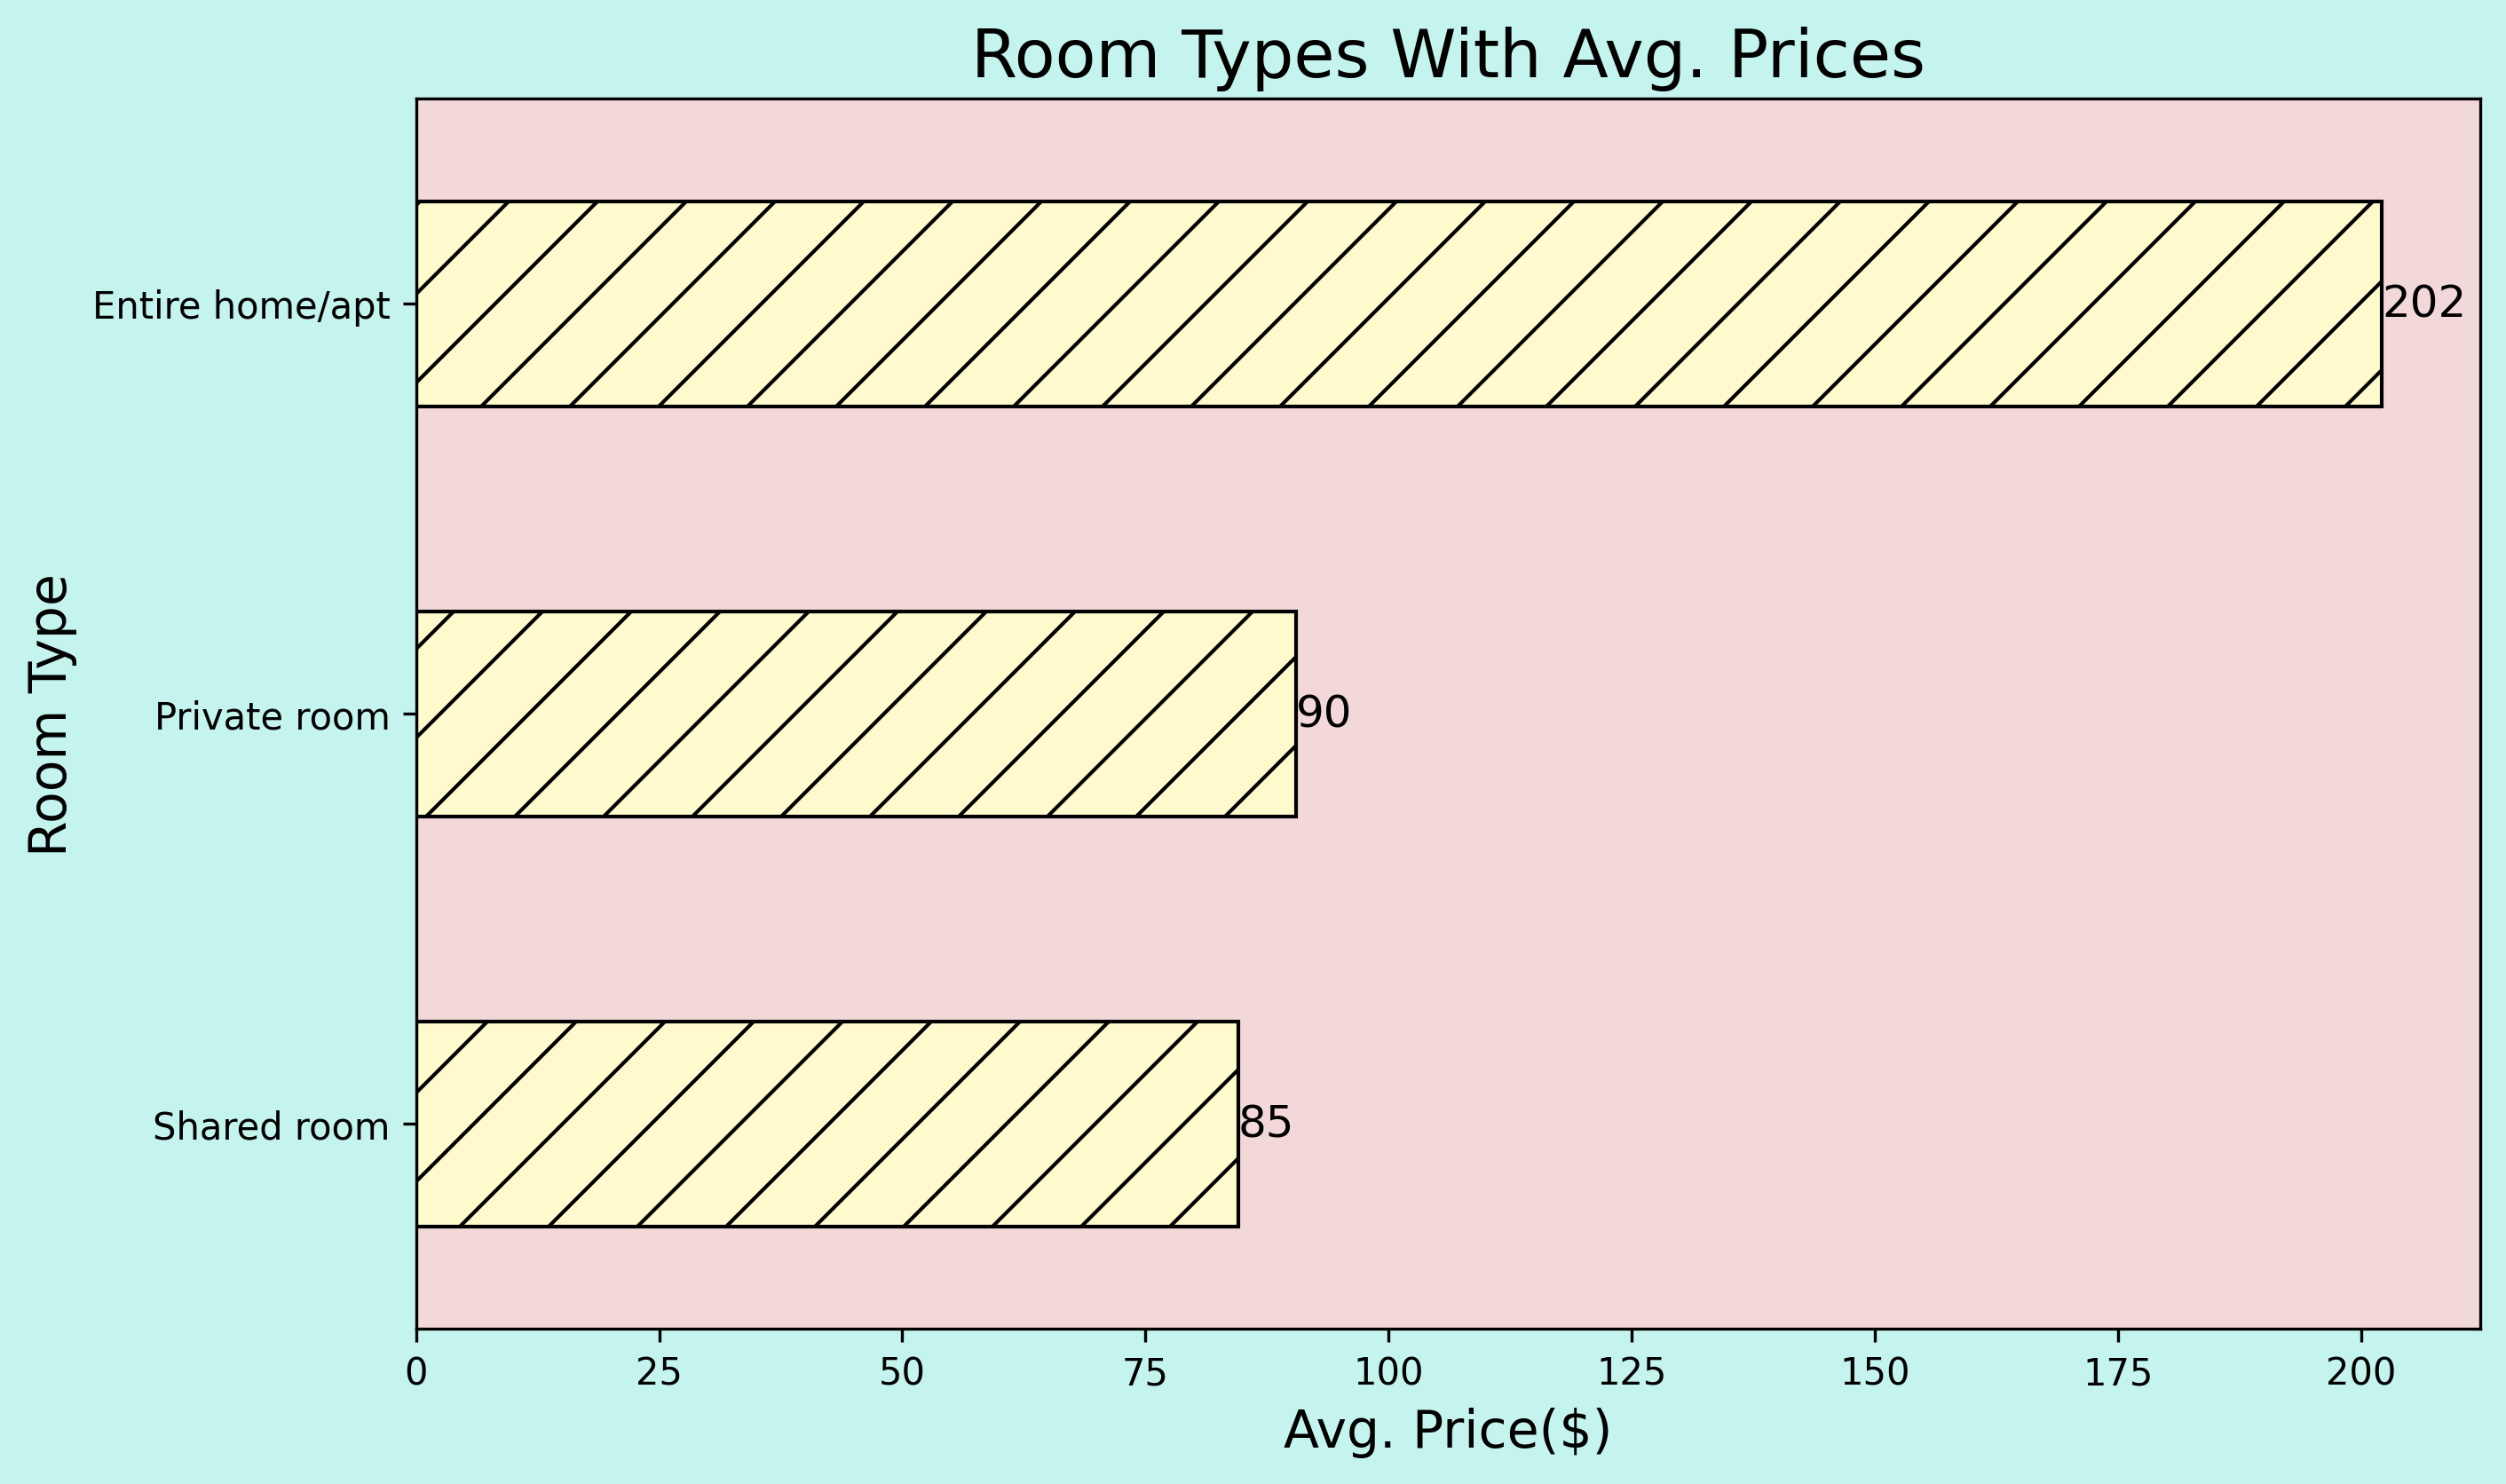

In [81]:
plt.figure(facecolor='#C5F3ED')
ax = plt.axes()
r_p_mean_data = data.groupby("room_type")["price"].agg("mean")
r_p_mean_data.sort_values(ascending=True).plot(kind = "barh", 
                                             color = "lemonchiffon",
                                             hatch="/", 
                                             edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Avg. Price($)", size = 14)
plt.ylabel("Room Type", size = 14)
plt.title("Room Types With Avg. Prices", size = 18)

Mean Price of Entire home/apt is almost twice of the others.

Price will be our target column in this project. So, let's check the distribution of price.

Text(0.5, 1.0, 'Price Distribution After Log Transformation')

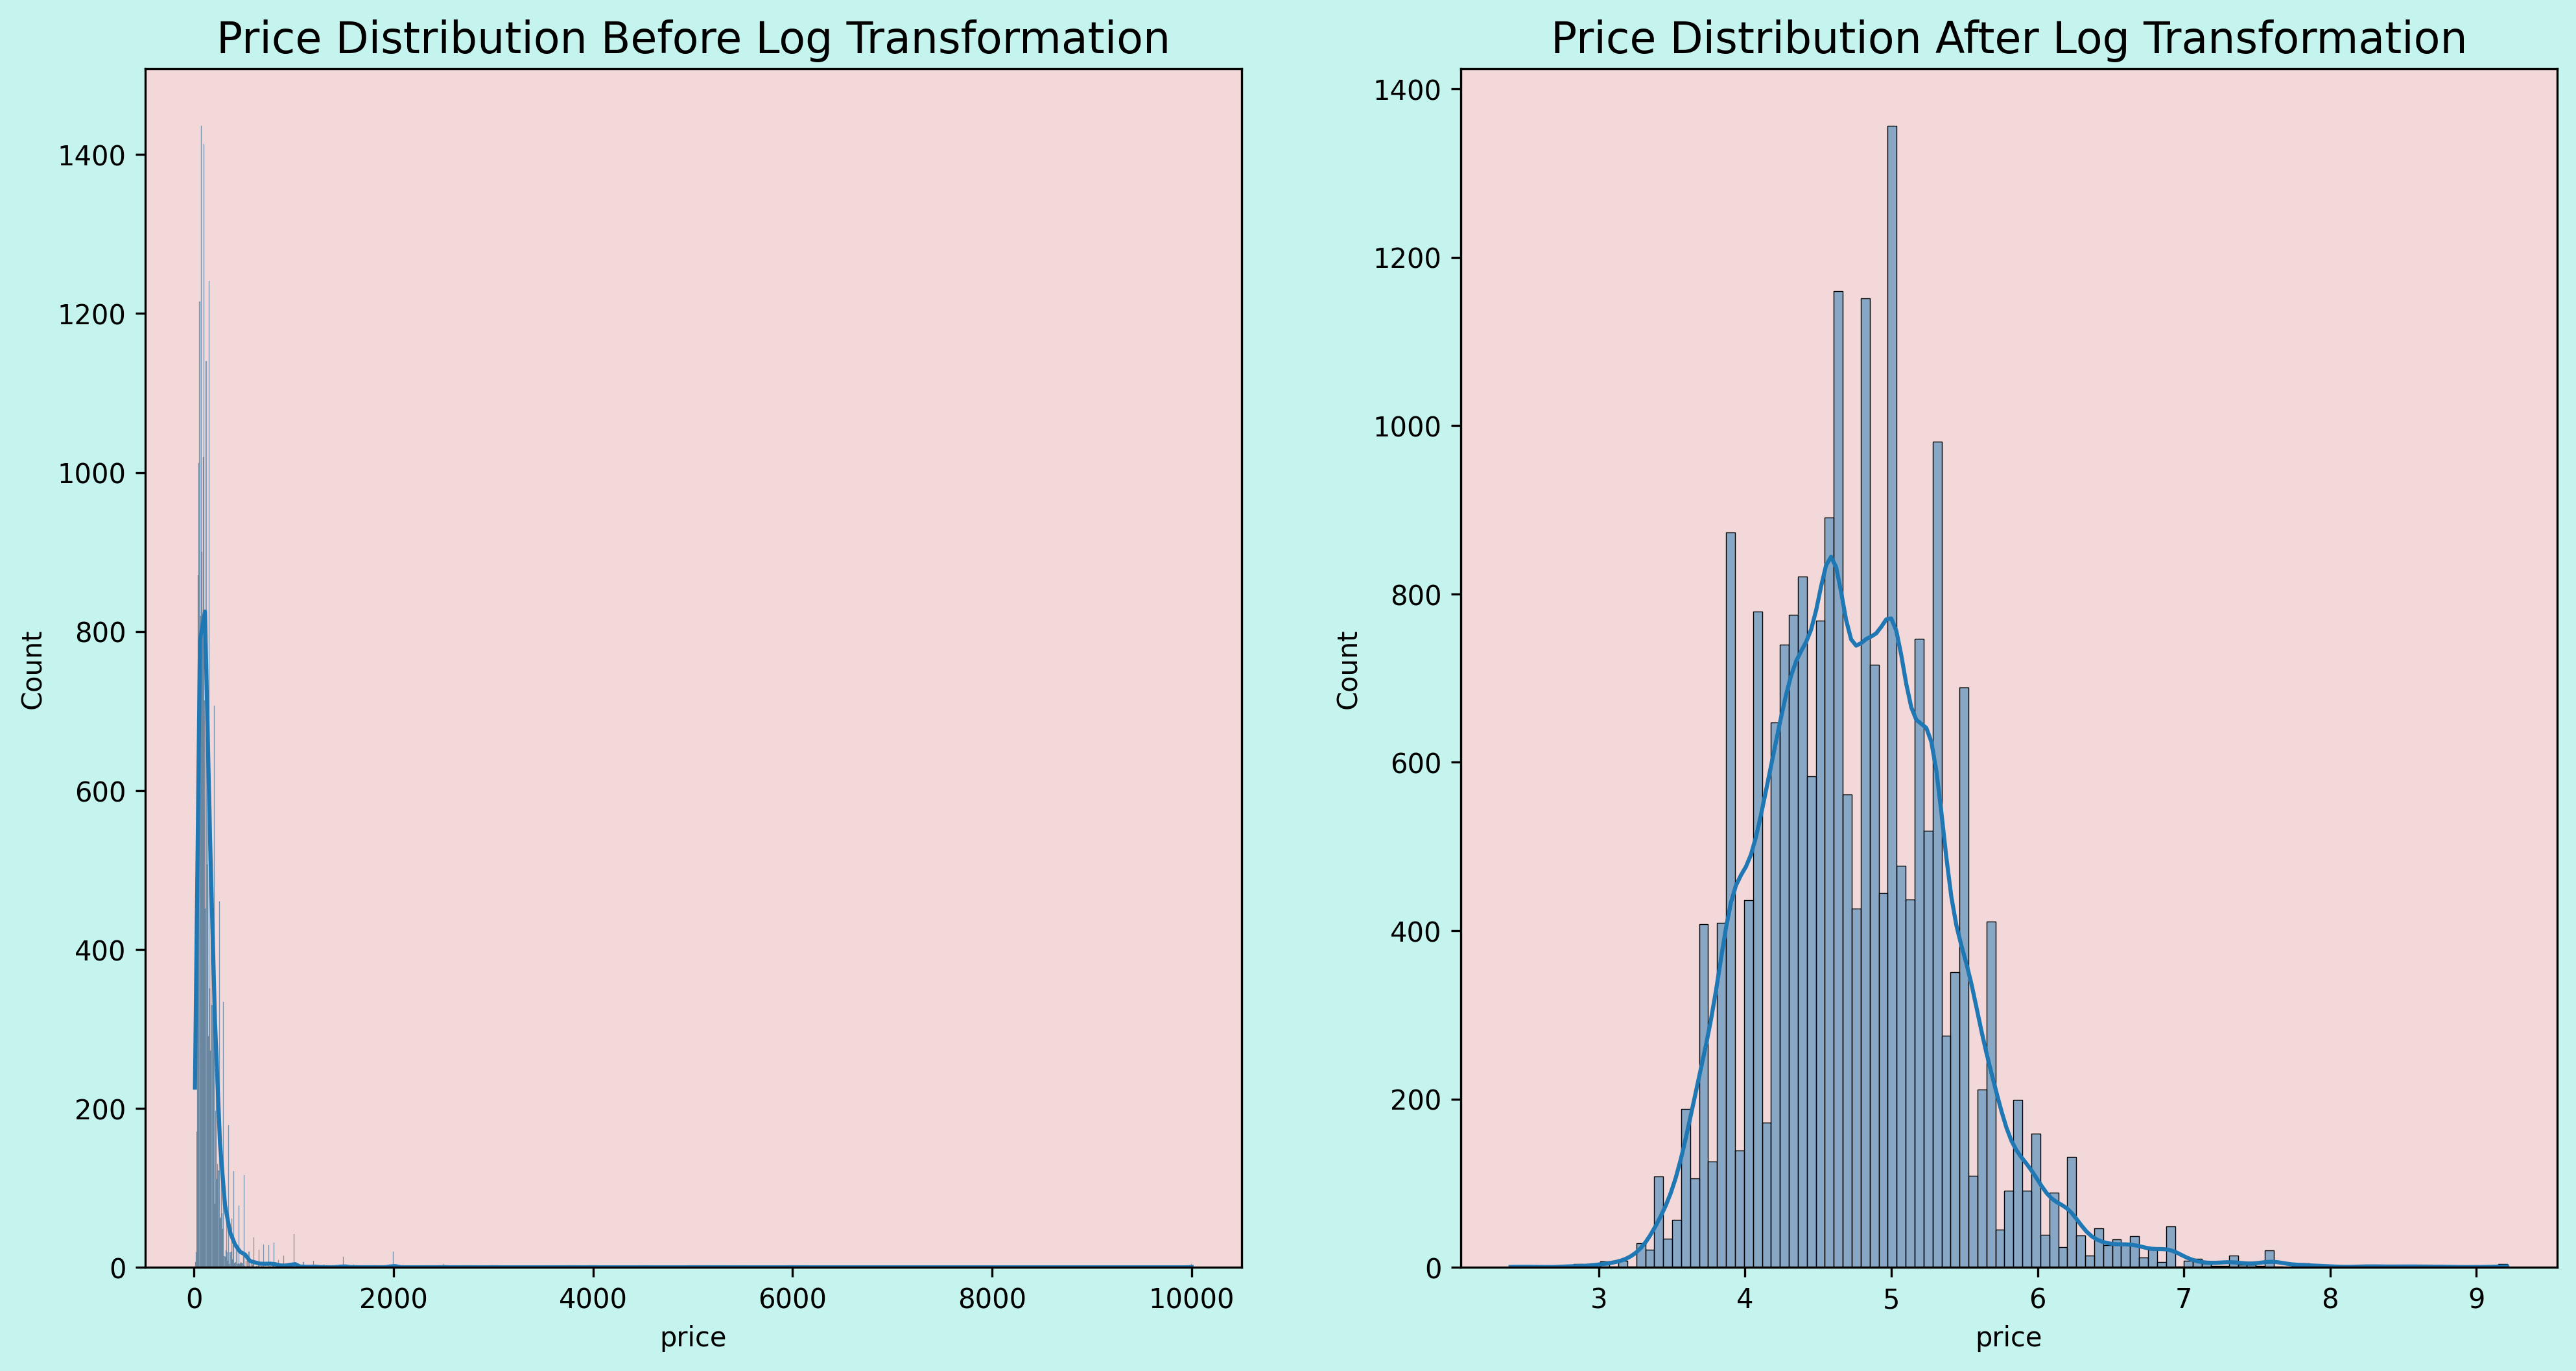

In [82]:
fig, ax = plt.subplots(1,2, figsize = (16,8), facecolor='#C5F3ED')
sns.histplot(data=data, x="price", kde=True, ax=ax[0]).set_title("Price Distribution Before Log Transformation",
                                                                size = 16)
sns.histplot(np.log1p(data.price), kde=True, ax=ax[1]).set_title("Price Distribution After Log Transformation",
                                                                size = 16)

The graph on the left shows that there is a right skewed distribution. To make a better statistical analysis and to get better scores, we will be applied log transformation for the price column.

#### Detection of Outliers

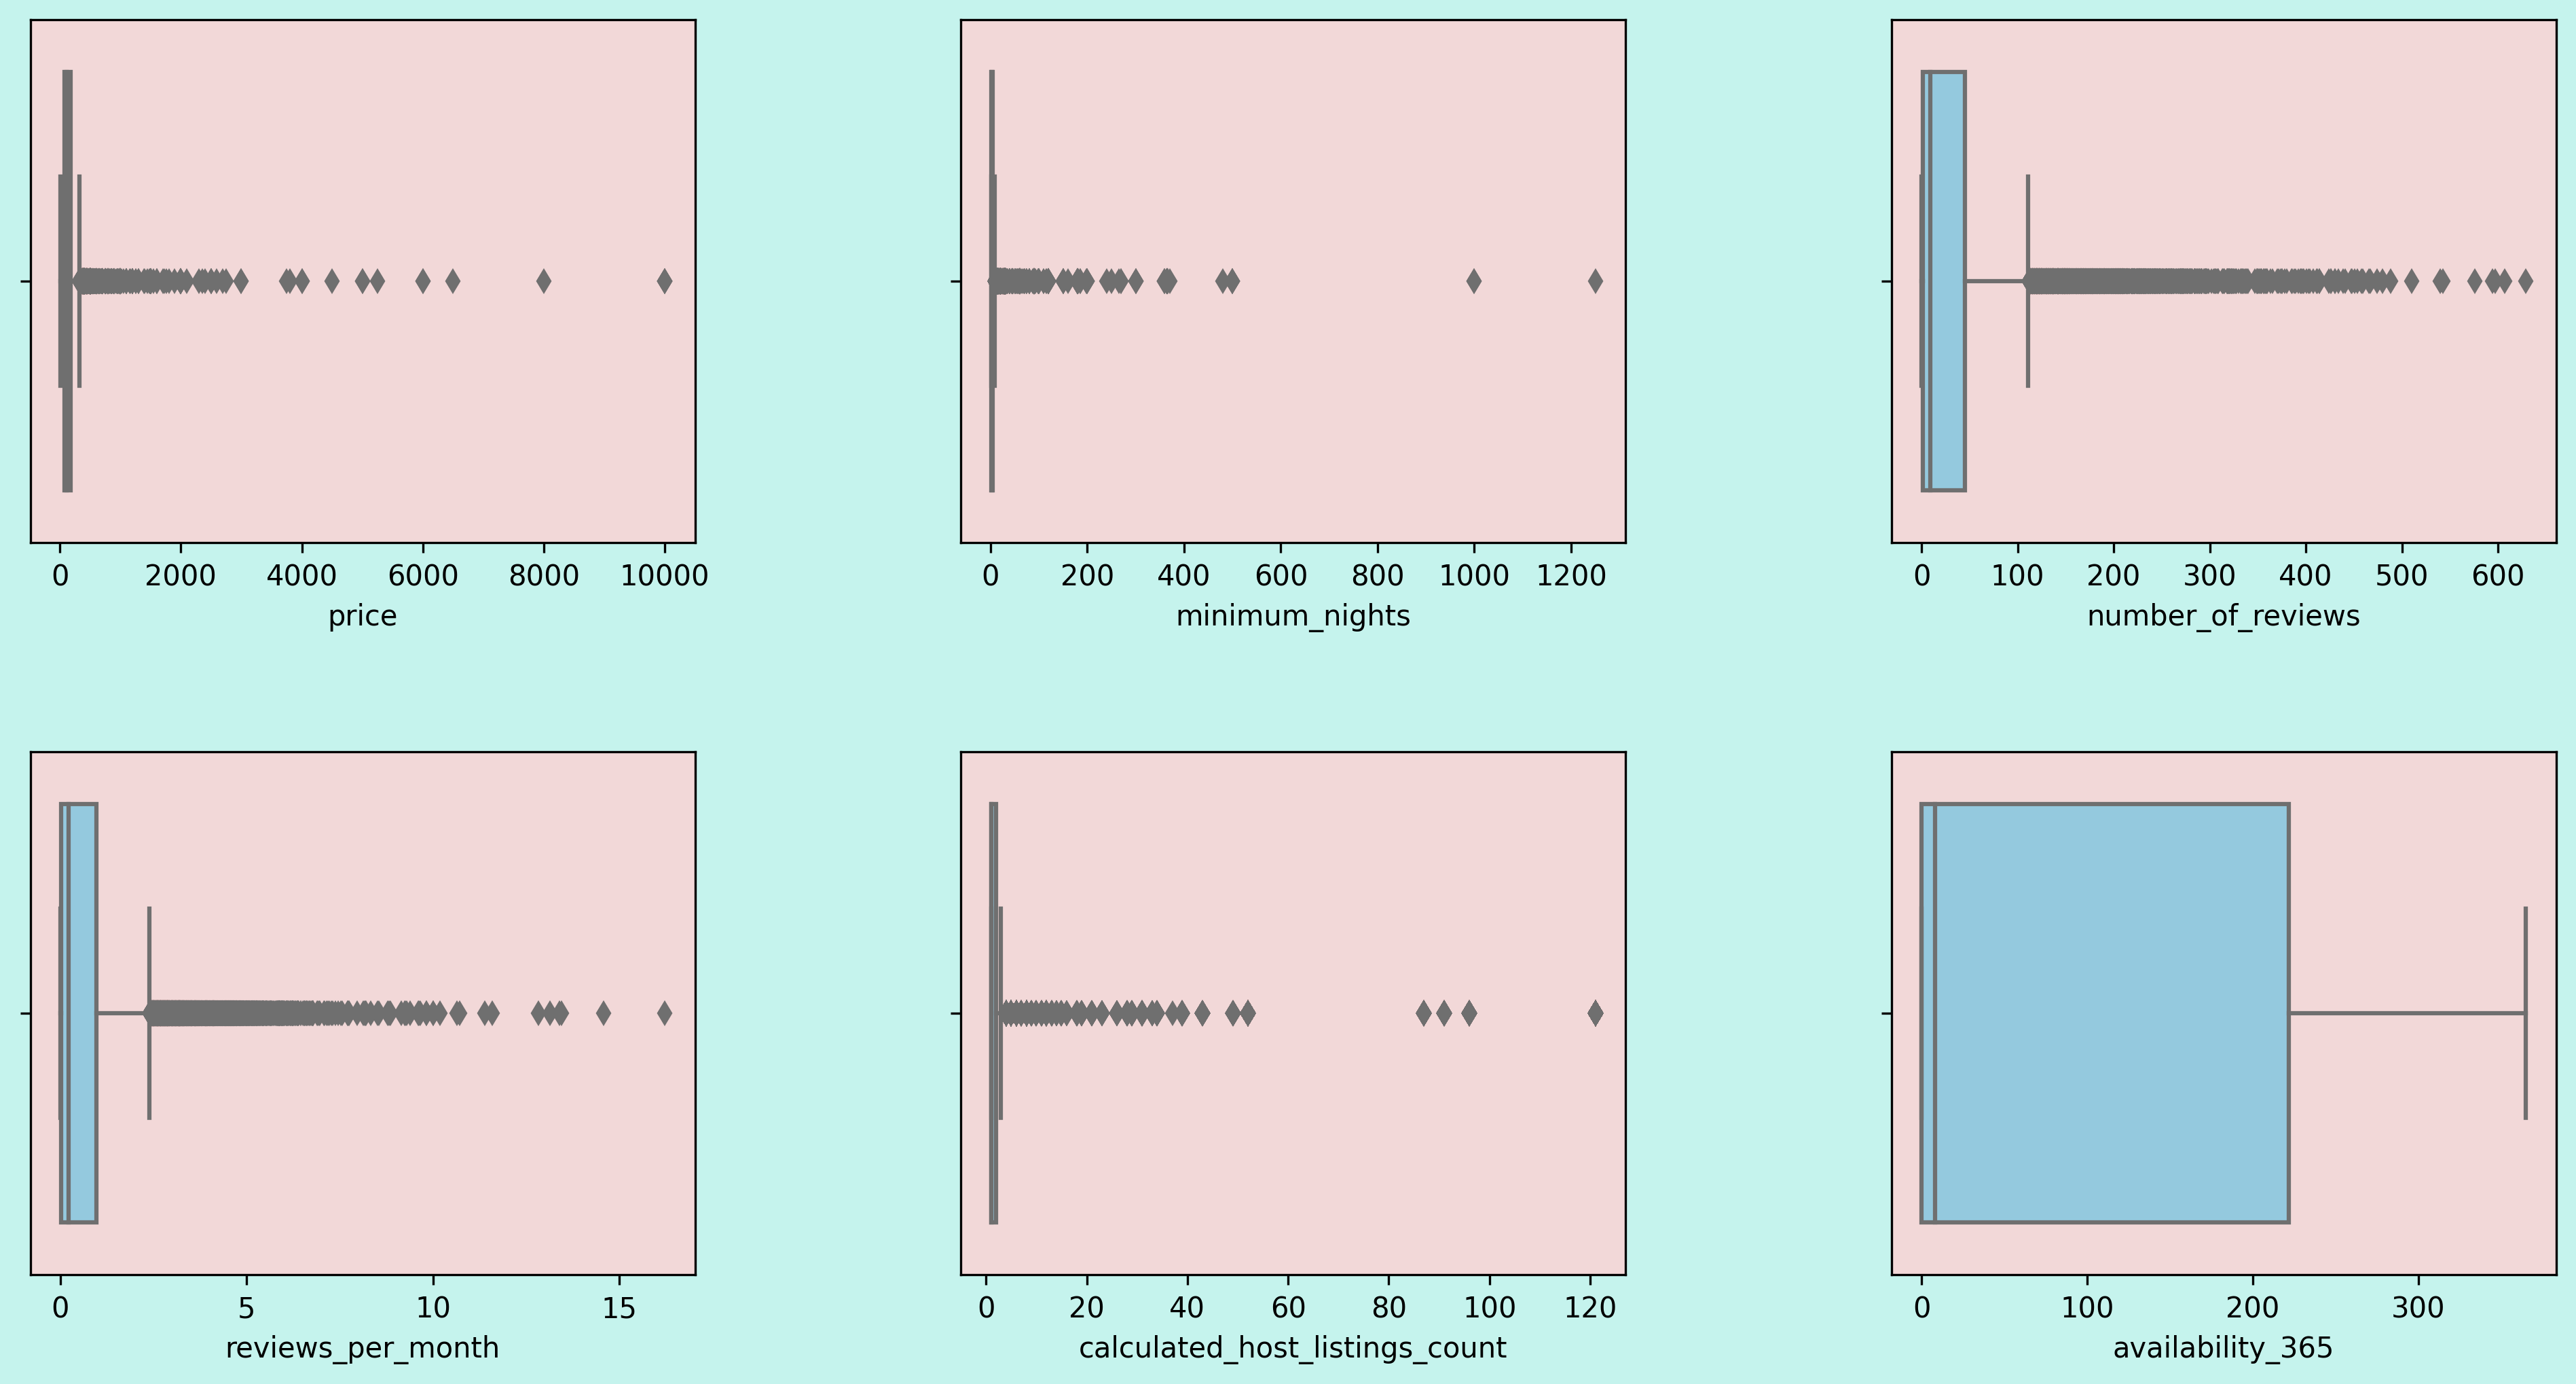

In [83]:
columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
fig = plt.figure(facecolor='#C5F3ED', figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(columns):
    ax = fig.add_subplot(2, 3, num +1)
    ax = sns.boxplot(x=data[column_name], color='skyblue')

In [84]:
q1_price = data["price"].quantile(0.25)
q3_price = data["price"].quantile(0.75)
iqr_price = q3_price - q1_price
lower_limit_price = q1_price - 1.5 * iqr_price
upper_limit_price = q3_price + 1.5 * iqr_price

data_filter_price = data[(data["price"] > lower_limit_price) & (data["price"] < upper_limit_price)]

data = data_filter_price

#### Correlation Matrix

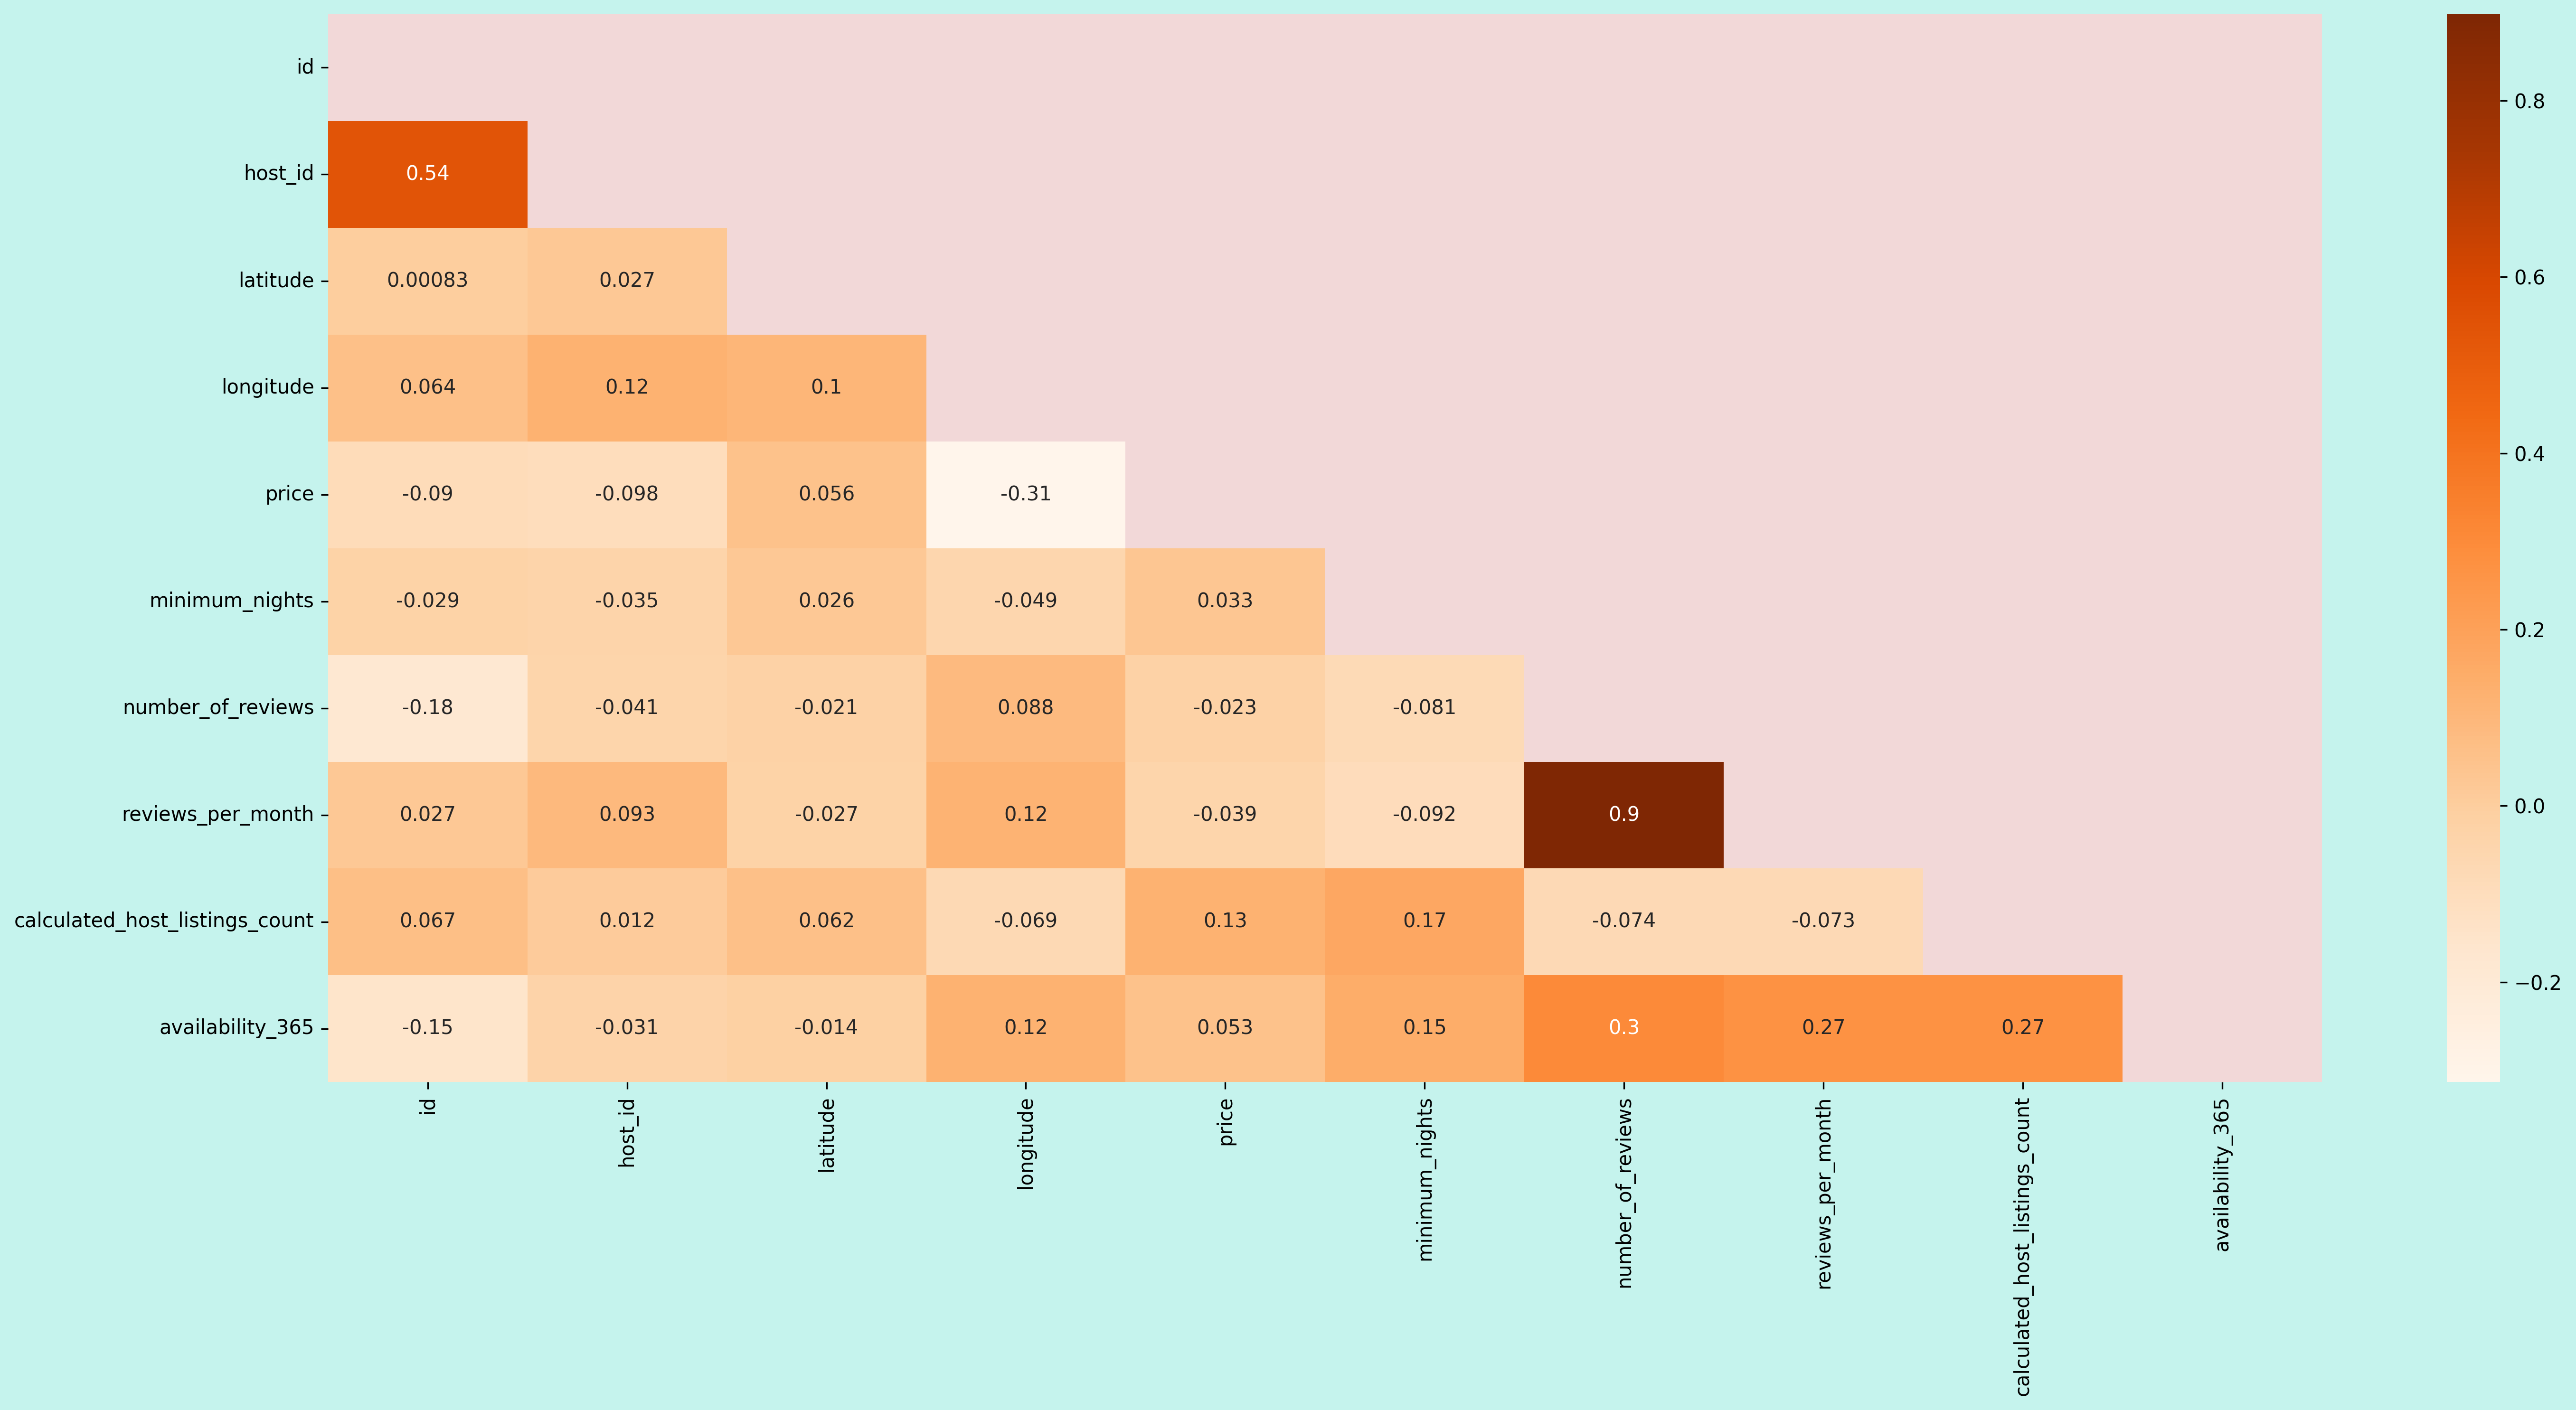

In [85]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(20, 10), facecolor='#C5F3ED')
data_corr = numeric_data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool))
sns.heatmap(data_corr, mask=mask, annot=True, cmap="Oranges")
plt.tight_layout()
plt.show()

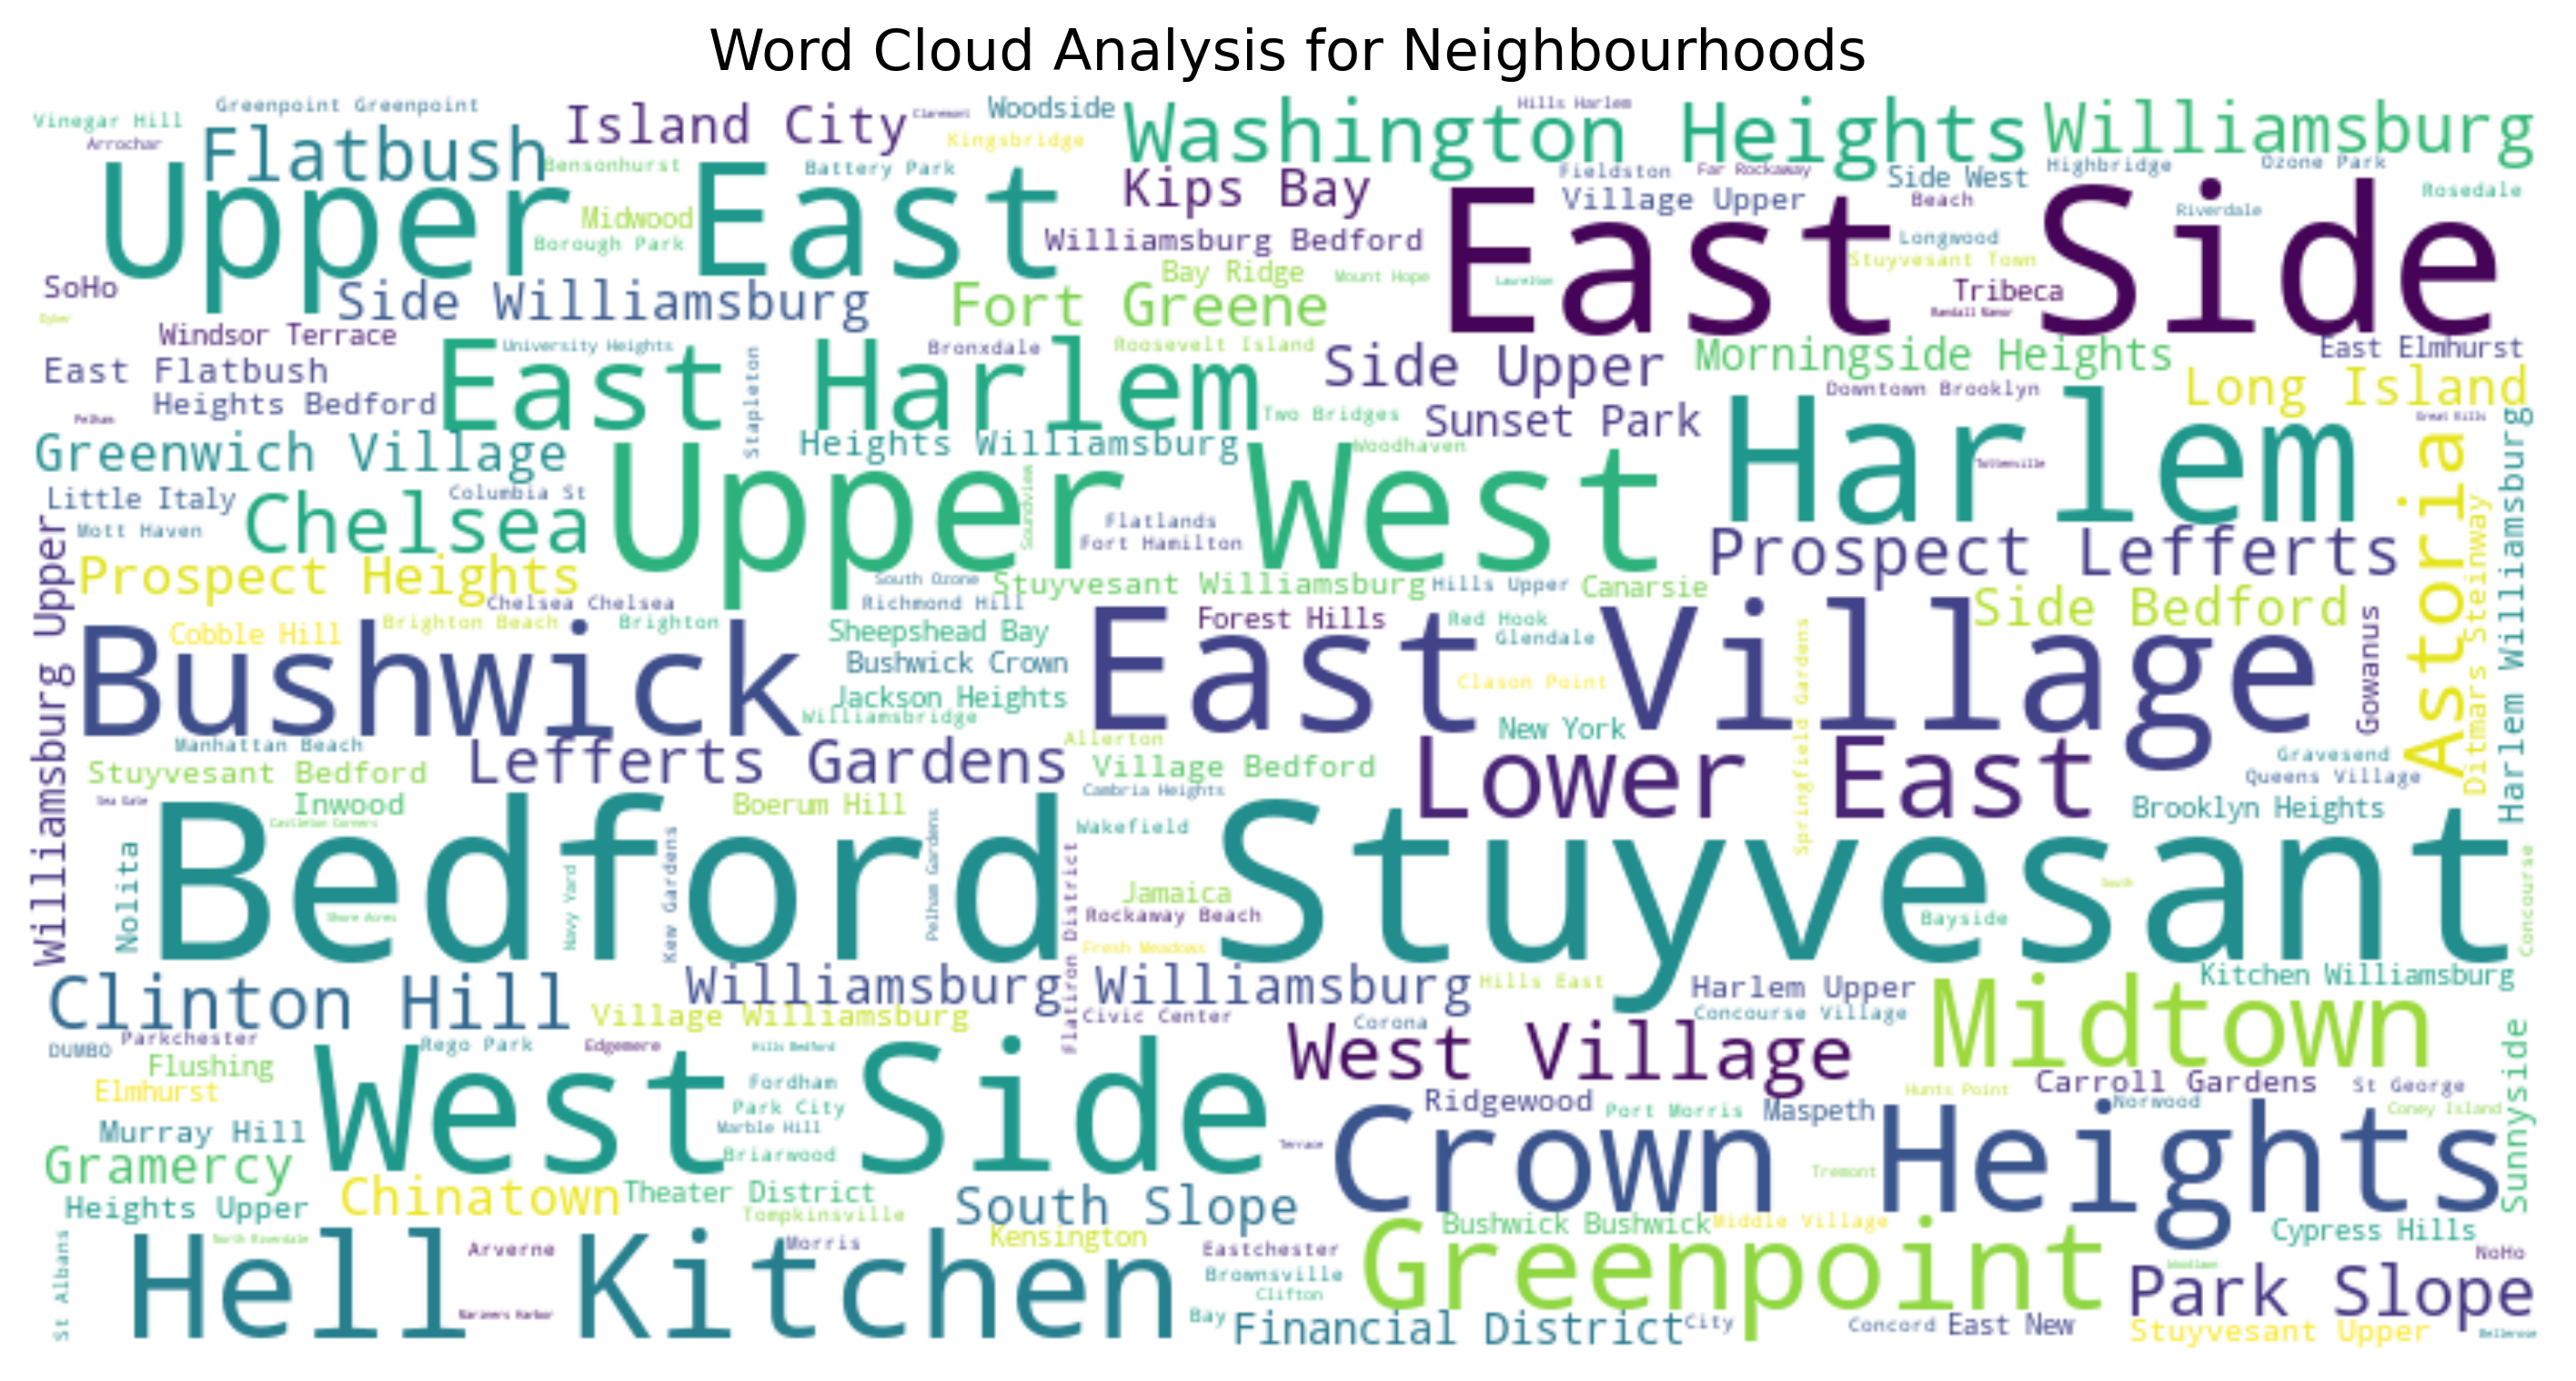

In [86]:
# Creating word cloud analysis on 'neighbourhood' column
from wordcloud import WordCloud

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400
).generate(" ".join(data['neighbourhood']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Analysis for Neighbourhoods", fontsize=15)
plt.show()

#### Data Preparation

Let's drop the columns that will not affect the price prediction.

In [87]:
data.drop(["id", "name", "host_id", "host_name", "last_review"], axis = 1, inplace = True)

Applying log transformation for the price column.

In [88]:
data["price"] = np.log1p(data["price"])
X = data.drop("price", axis = 1)
y = data["price"]

Splitting Data as Train Data and Test Data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

##### Encoding

In [90]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
columns = ["neighbourhood_group", "neighbourhood", "room_type"]

ohe_df_train = pd.DataFrame(ohe.fit_transform(X_train[columns]).toarray(), columns=ohe.get_feature_names_out(columns))
X_train_ohe = X_train.join(ohe_df_train).drop(columns=columns, axis=1)

ohe_df_test = pd.DataFrame(ohe.transform(X_test[columns]).toarray(), columns=ohe.get_feature_names_out(columns))
X_test_ohe = X_test.join(ohe_df_test).drop(columns=columns, axis=1)

##### Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_ohe)
X_test = scaler.transform(X_test_ohe)

### Model Building and Comparison

#### Evaluation Metrics
- Test Score
- Train Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Root Mean Squared Error - Cross Validation (RMSE CV)

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

def evaluate_models(models, model_names, X_train, X_test, y_train, y_test):
    results = []
    
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        test_score = r2_score(y_test, y_pred)
        train_score = model.score(X_train, y_train)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_cv = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())

        results.append({
            "Model": model_name,
            "Test Score)": f"{test_score*100:.2f}%",
            "Train Sccore": f"{train_score*100:.2f}%",
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "RMSE CV": rmse_cv
        })

    results_df = pd.DataFrame(results)
    return results_df

# Define models and model names
models = [
    Ridge(alpha=1.0),
    Lasso(alpha=0.0001),
    DecisionTreeRegressor(min_samples_leaf=60),
    RandomForestRegressor(random_state=42, n_estimators=100, min_samples_split=10,
                          min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True),
    GradientBoostingRegressor(),
    SVR(),
    XGBRegressor()
]

model_names = [
    "Ridge",
    "Lasso",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "SVR",
    "XGBRegressor"
]

# Call the function to evaluate and store the metrics in a DataFrame
results_df = evaluate_models(models, model_names, X_train, X_test, y_train, y_test)
results_df

Model Test Score) Train Sccore       MAE       MSE      RMSE  \
0              Ridge      58.46%       58.42%  0.270379  0.119369  0.345498   
1              Lasso      58.49%       58.41%  0.270389  0.119290  0.345384   
2      Decision Tree      58.18%       62.40%  0.272667  0.120187  0.346680   
3      Random Forest      62.25%       78.15%  0.257422  0.108467  0.329343   
4  Gradient Boosting      61.75%       62.84%  0.260198  0.109913  0.331531   
5                SVR      58.57%       60.73%  0.268821  0.119066  0.345060   
6       XGBRegressor      61.66%       73.82%  0.259737  0.110166  0.331912   

    RMSE CV  
0  0.355532  
1  0.355122  
2  0.350737  
3  0.336810  
4  0.338870  
5  0.353811  
6  0.339595

# Conclusion
By applying data to these ML Algorithms, we found that the Random Forest Regressor  has the best performance. Random Forest Regressor has the highest R-squared score and lowest MSE score.